In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:

from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.metrics import roc_auc_score
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd 
import os
from scipy import stats

import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as smf

from scipy.stats import shapiro 


os.chdir("C:/Users/USER/Desktop/Kodluyoruz")

data= pd.read_excel("HW_Data_Set.xlsx")
data.head()

ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target  
0  0.701906  15.135802  35.625252  36.997753  
1  0.690833  15.143348  35.643013  37.016198  
2  0.693040  15.146870  35.651301 -37.024805  
3  0.673418  15.153283   0.000000 -37.040483  
4  0.700522 -15.179065 -35.727079 -37.103503  

[5 rows x 136 columns]

In [ ]:
class Information():
    
    def __init__(self,data):
      self.data = data
    def info_data(self):
      print(self.data.head()) 
      print(self.data.info)
      print(self.data.dtypes)
      print(self.data.shape)
      print(self.data.isnull().sum(axis = 0))

class PreProcessing():
    def __init__(self,data):
        self.data = data
    def fill_missing_value(self):
        data=self.data.dropna()

class Visualizer():
    def bar_plot(self,x,y,z = None):
        plt.figure(figsize=(6,5))
        sns.barplot(x=x, y=y, hue=z, data=self.data)
    def scatterplot(self, data1, data2, xlabel=None, ylabel=None):
        plt.figure(figsize=(10,6))
        plt.scatter(data1, data2)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    def histogram(self, data):
        sns.distplot(data)
        plt.show()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [3]:
data.shape

(6167, 136)

In [4]:
for i in data.columns:
    print(i)

ind_5
ind_6
ind_8
ind_9
ind_10
ind_12
ind_13
ind_14
ind_15
ind_16
ind_17
ind_18
ind_19
ind_20
ind_21
ind_22
ind_23
ind_25
ind_26
ind_27
ind_28
ind_29
ind_30
ind_31
ind_32
ind_33
ind_34
ind_35
ind_36
ind_37
ind_39
ind_40
ind_41
ind_42
ind_43
ind_44
ind_45
ind_46
ind_47
ind_48
ind_49
ind_50
ind_51
ind_52
ind_53
ind_56
ind_58
ind_61
ind_62
ind_65
ind_67
ind_70
ind_71
ind_74
ind_77
ind_82
ind_83
ind_88
ind_92
ind_102
ind_109
ind_116
ind_118
ind_122
ind_124
ind_128
ind_130
ind_132
ind_134
ind_136
ind_139
ind_142
ind_145
ind_147
ind_150
ind_153
ind_156
ind_164
ind_168
ind_172
ind_176
ind_179
ind_181
ind_188
ind_194
ind_212
ind_217
ind_225
ind_228
ind_234
ind_237
ind_239
ind_241
ind_243
ind_309
ind_310
ind_311
ind_313
ind_315
ind_316
ind_318
ind_321
ind_324
ind_327
ind_330
ind_332
ind_334
ind_338
ind_340
ind_344
ind_345
ind_347
ind_349
ind_351
ind_352
ind_387
ind_392
ind_397
ind_399
ind_403
ind_404
ind_406
ind_407
ind_410
ind_412
ind_414
ind_416
ind_418
ind_420
ind_422
ind_424
ind_426
ind_428

In [5]:
#değişken tiplerini inceleyip, kategorik olanları tespit ettim
data.dtypes 
for i in data.dtypes:
    print(i)

int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
object
int64
float64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
float64
float64
float64
int64
object
object
float64
float64
float64
float64
float64
float64


In [5]:
data.select_dtypes(include=['object'])

ind_109 ind_420 ind_422
0      GREEN    -152    -353
1      GREEN    -158    -359
2      GREEN    -160    -362
3      GREEN    -166    -367
4      GREEN    -186    -388
...      ...     ...     ...
6162     RED     -11    -270
6163     RED     -12    -271
6164   GREEN     -21    -280
6165   GREEN     -33    -292
6166   GREEN     -28    -288

[6167 rows x 3 columns]

In [6]:
#kategorik değişkenleri irdeledim

In [7]:
print(data["ind_109"].value_counts())
print(data["ind_420"].value_counts())
print(data["ind_422"].value_counts())

GREEN    3132
RED      3035
Name: ind_109, dtype: int64
?       1041
28        37
45        35
29        33
39        33
        ... 
-327       1
-330       1
-349       1
297        1
-346       1
Name: ind_420, Length: 582, dtype: int64
?       1041
-211      33
-125      31
-200      30
-212      28
        ... 
-500       1
-496       1
-484       1
-482       1
-509       1
Name: ind_422, Length: 573, dtype: int64


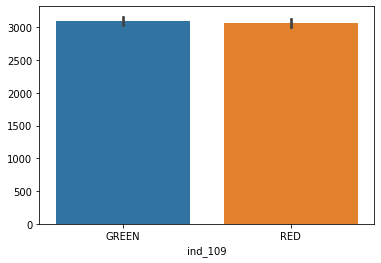

In [8]:
sns.barplot(x = "ind_109", y = data.ind_109.index, data= data);

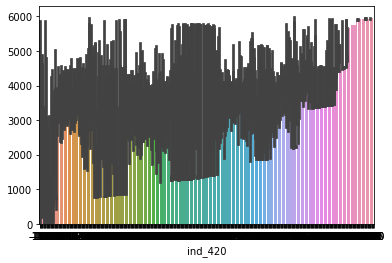

In [85]:
sns.barplot(x = "ind_420", y = data.ind_420.index, data= data);

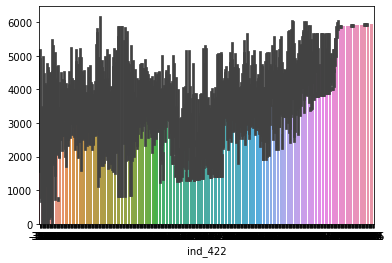

In [86]:
sns.barplot(x = "ind_422", y = data.ind_422.index, data= data);

In [9]:
data.describe().T

count       mean        std         min        25%        50%  \
ind_5      6167.0  -0.803146  23.624403 -131.000000 -14.000000   0.000000   
ind_6      6167.0  -0.803470  23.624144 -131.000000 -14.000000   0.000000   
ind_8      6167.0  48.388890  36.388526    0.000000  14.285714  50.000000   
ind_9      6167.0  48.289282  36.478009    0.000000  14.285714  50.000000   
ind_10     6167.0   0.099609  60.414625 -100.000000 -50.000000   0.000000   
...           ...        ...        ...         ...        ...        ...   
ind_426    6167.0   0.498188   0.228547    0.000000   0.323783   0.495192   
ind_428    6167.0   0.490174   0.150483    0.083530   0.379894   0.487078   
20_target  6167.0  -0.057102  14.834497  -15.780588 -15.350354   0.000000   
50_target  6167.0  -2.906358  34.559778  -37.142889 -36.208094 -34.267756   
90_target  6167.0  -3.315072  36.841541  -38.573858 -37.695273 -35.788391   

                 75%         max  
ind_5      13.000000   76.000000  
ind_6      13.000000   76.000000  
ind_8      85.714286  100.000000  
ind_9      85.714286  100.000000  
ind_10     57.142857  100.000000  
...              ...         ...  
ind_426     0.675730    1.000000  
ind_428     0.601508    0.868534  
20_target  15.385945   15.768767  
50_target  35.879524   37.038694  
90_target  37.521892   38.465649  

[133 rows x 8 columns]

In [3]:
data.isnull().values.any()

False

In [3]:
data.corr()

ind_5     ind_6     ind_8     ind_9    ind_10    ind_12  \
ind_5      1.000000  0.989945  0.543246 -0.533328  0.649225  0.822255   
ind_6      0.989945  1.000000  0.514222 -0.495572  0.608947  0.768551   
ind_8      0.543246  0.514222  1.000000 -0.374857  0.828650  0.583623   
ind_9     -0.533328 -0.495572 -0.374857  1.000000 -0.829576 -0.609288   
ind_10     0.649225  0.608947  0.828650 -0.829576  1.000000  0.719409   
...             ...       ...       ...       ...       ...       ...   
ind_426    0.626439  0.567359  0.593799 -0.631961  0.739227  0.776076   
ind_428    0.817302  0.810371  0.445427 -0.450719  0.540428  0.807595   
20_target  0.060969  0.062101 -0.004126 -0.031316  0.016423  0.042550   
50_target  0.068989  0.069652  0.006984 -0.004053  0.006654  0.055045   
90_target  0.060428  0.061560 -0.006650  0.012093 -0.011307  0.043786   

             ind_13    ind_14    ind_15    ind_16  ...   ind_412   ind_414  \
ind_5      0.768234 -0.014502 -0.026336 -0.041130  ...  0.620106 -0.694619   
ind_6      0.713870 -0.006066 -0.019393 -0.035795  ...  0.634679 -0.646983   
ind_8      0.482220  0.162635  0.139612  0.038862  ...  0.275687 -0.489596   
ind_9     -0.568581  0.238938  0.240048  0.152133  ... -0.276882  0.436275   
ind_10     0.633753 -0.046312 -0.060849 -0.068450  ...  0.333229 -0.558311   
...             ...       ...       ...       ...  ...       ...       ...   
ind_426    0.700736 -0.066201 -0.066437 -0.051049  ...  0.293592 -0.571432   
ind_428    0.727899  0.021970  0.016318  0.010361  ...  0.574646 -0.499656   
20_target  0.041289  0.015320  0.012012  0.026881  ...  0.066637 -0.029005   
50_target  0.048302  0.072728  0.084561  0.101774  ...  0.127234  0.008239   
90_target  0.043491  0.077710  0.088271  0.108077  ...  0.124265  0.018379   

            ind_416   ind_418   ind_424   ind_426   ind_428  20_target  \
ind_5     -0.304134 -0.620099  0.076169  0.626439  0.817302   0.060969   
ind_6     -0.279922 -0.569657  0.021220  0.567359  0.810371   0.062101   
ind_8     -0.277258 -0.432579  0.144795  0.593799  0.445427  -0.004126   
ind_9      0.349318  0.505772 -0.173139 -0.631961 -0.450719  -0.031316   
ind_10    -0.377913 -0.565931  0.191752  0.739227  0.540428   0.016423   
...             ...       ...       ...       ...       ...        ...   
ind_426   -0.356302 -0.594243  0.341017  1.000000  0.584754   0.019599   
ind_428   -0.260048 -0.487564  0.188853  0.584754  1.000000   0.047041   
20_target -0.009829 -0.045656 -0.008799  0.019599  0.047041   1.000000   
50_target  0.047728 -0.101488 -0.003372  0.009063  0.052418   0.384076   
90_target  0.049615 -0.096903 -0.007689 -0.002519  0.043563   0.355950   

           50_target  90_target  
ind_5       0.068989   0.060428  
ind_6       0.069652   0.061560  
ind_8       0.006984  -0.006650  
ind_9      -0.004053   0.012093  
ind_10      0.006654  -0.011307  
...              ...        ...  
ind_426     0.009063  -0.002519  
ind_428     0.052418   0.043563  
20_target   0.384076   0.355950  
50_target   1.000000   0.940916  
90_target   0.940916   1.000000  

[133 rows x 133 columns]

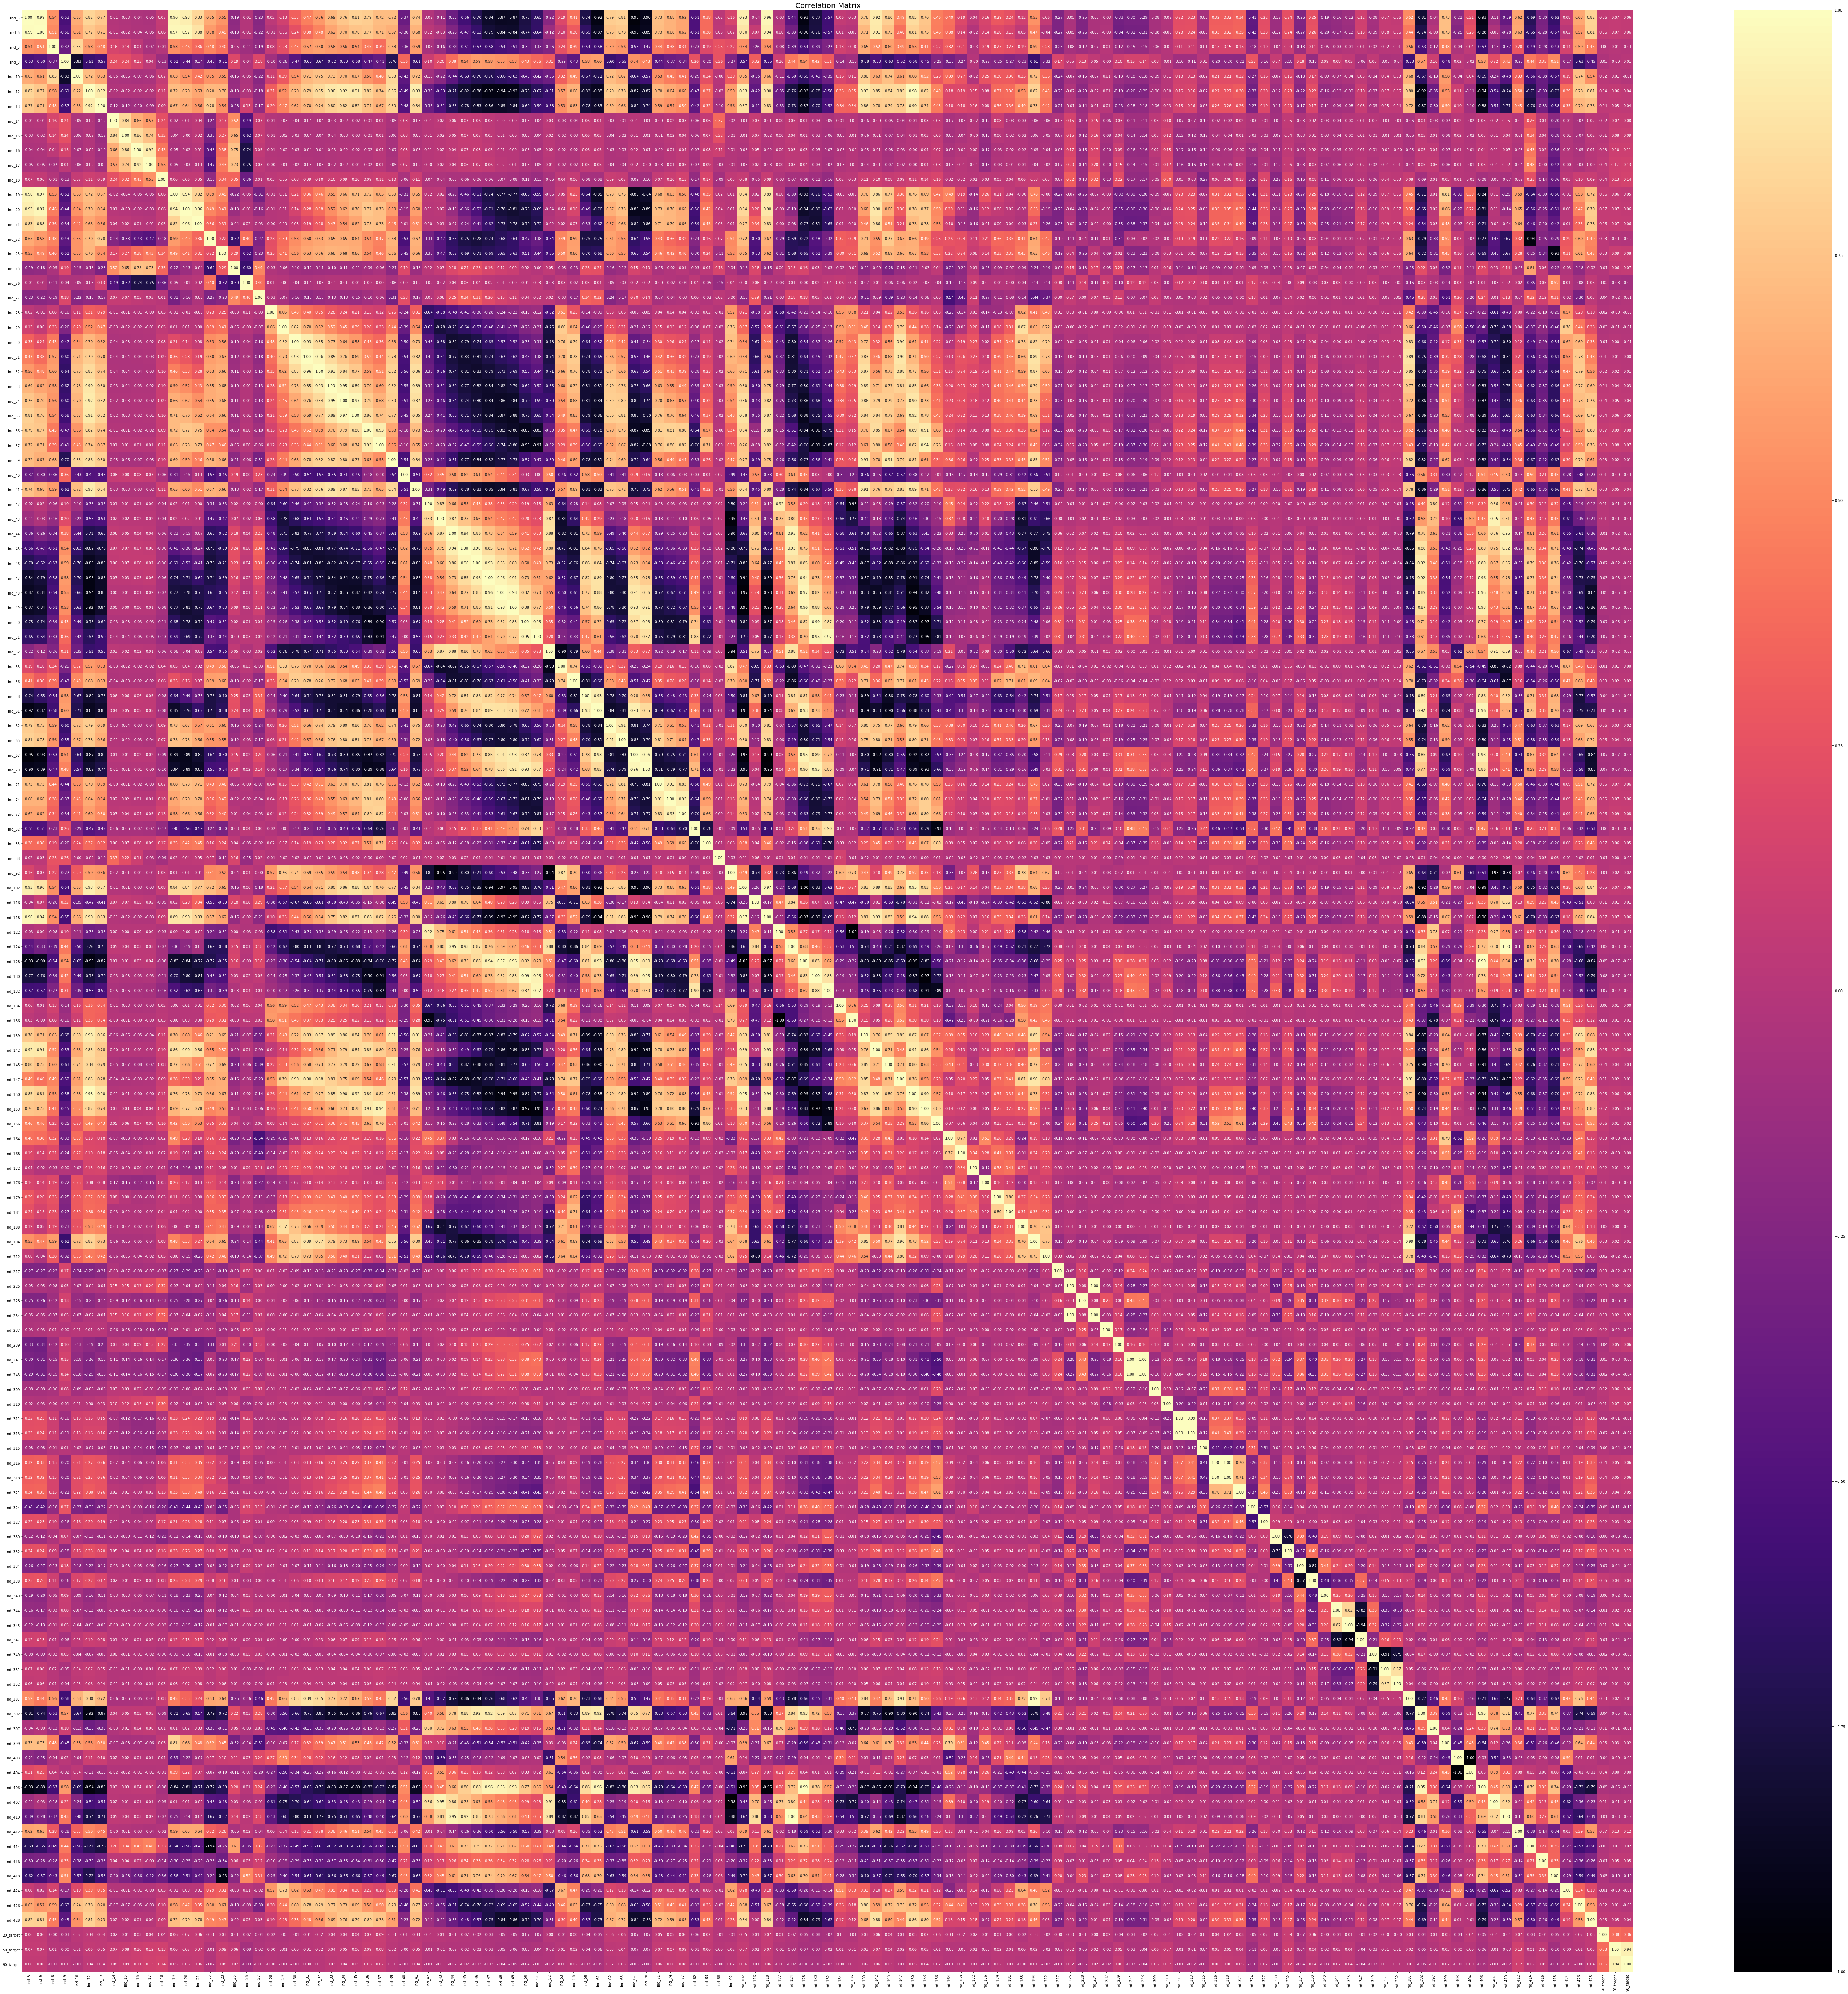

In [192]:
f, ax = plt.subplots(figsize= [100,100])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


TypeError: '<=' not supported between instances of 'int' and 'str'

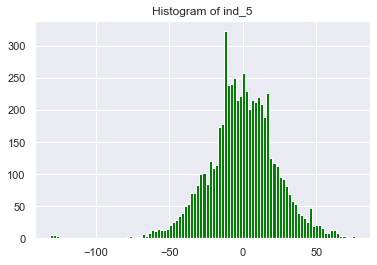

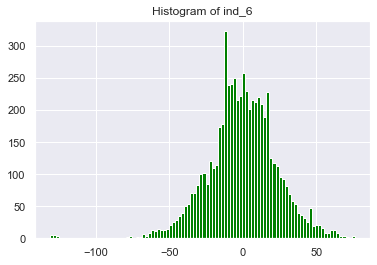

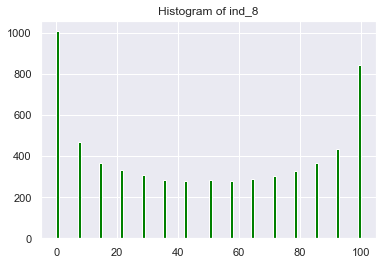

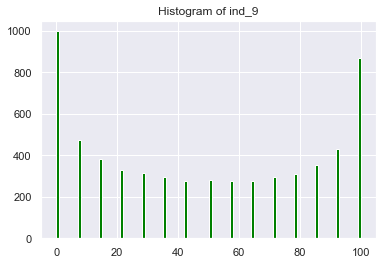

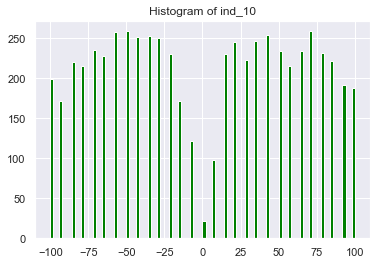

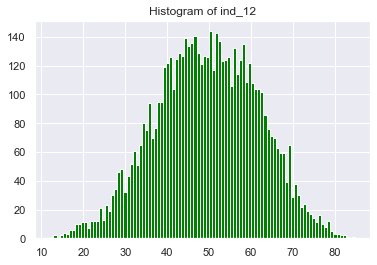

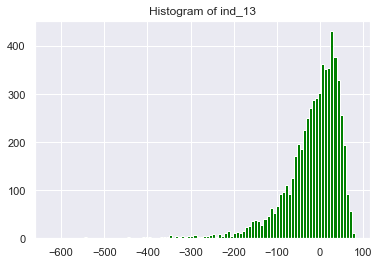

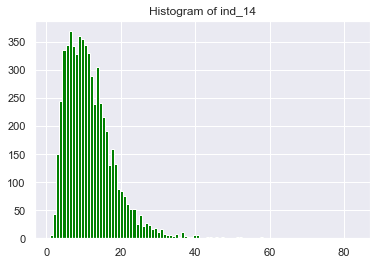

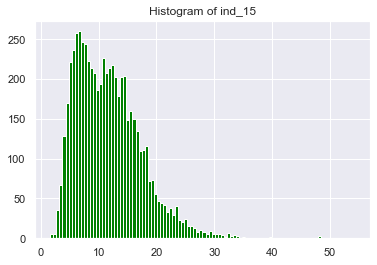

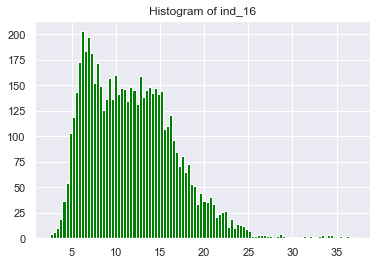

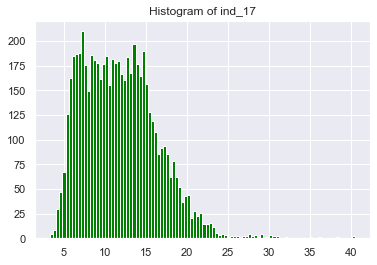

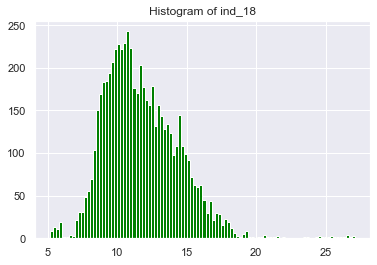

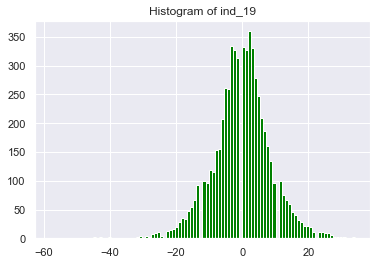

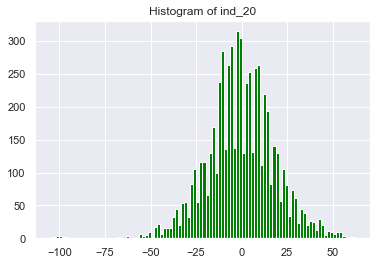

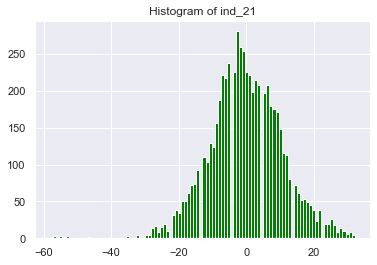

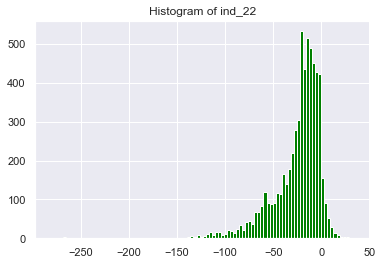

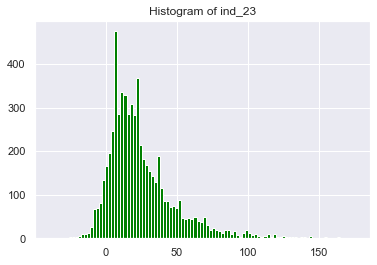

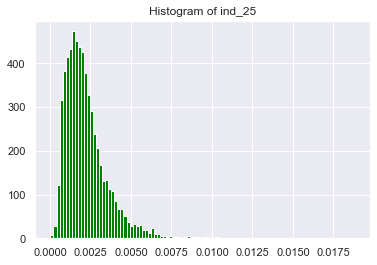

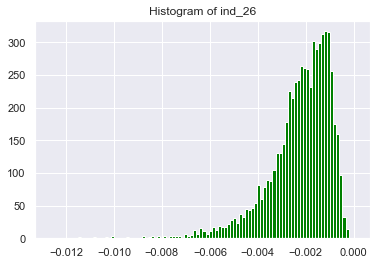

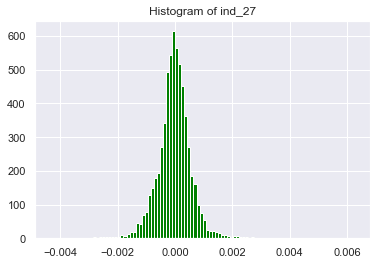

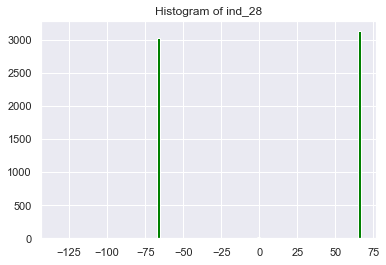

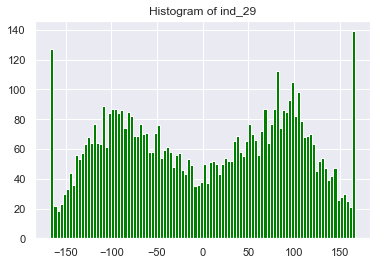

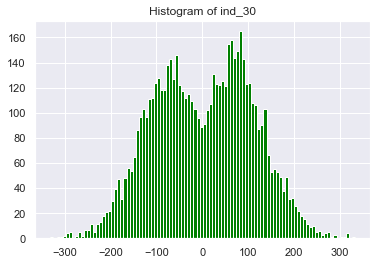

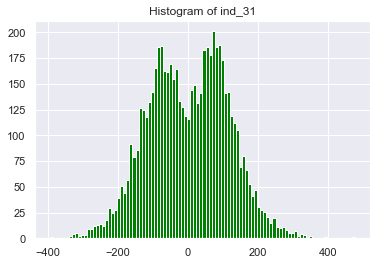

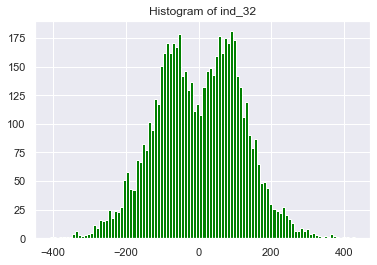

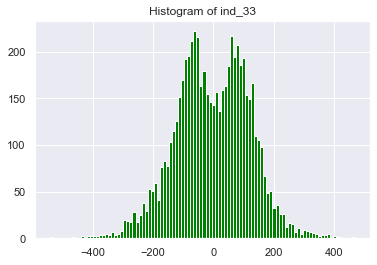

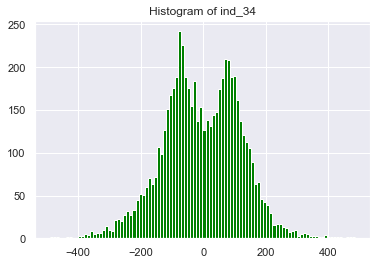

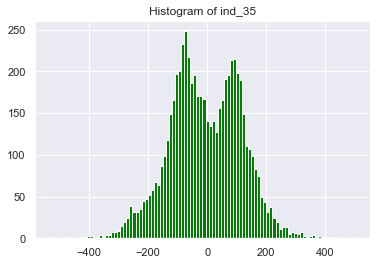

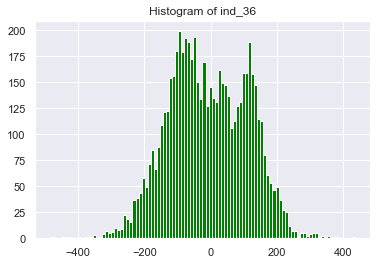

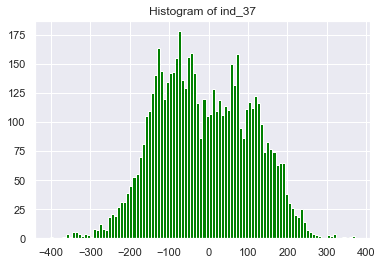

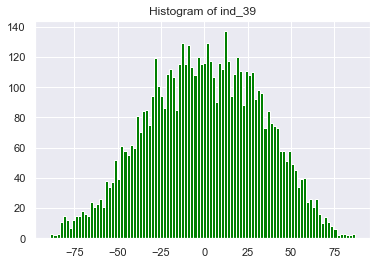

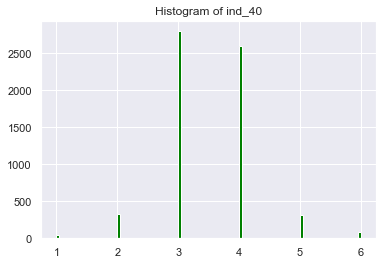

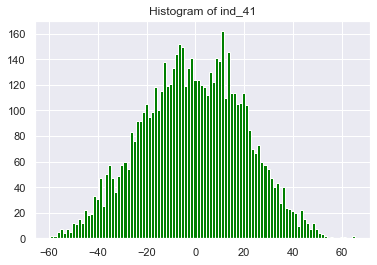

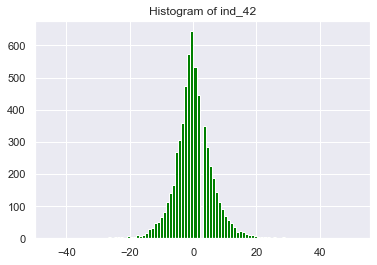

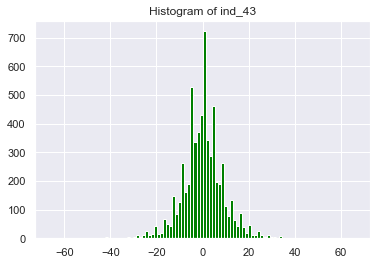

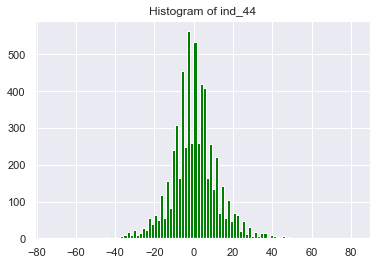

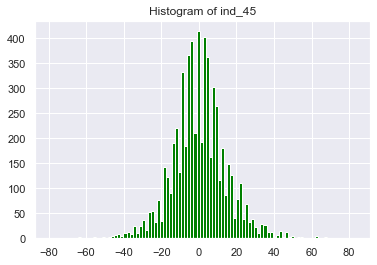

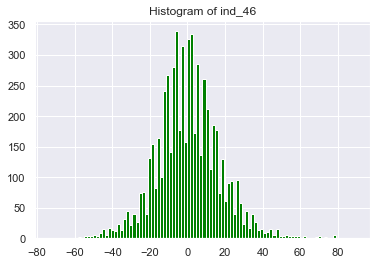

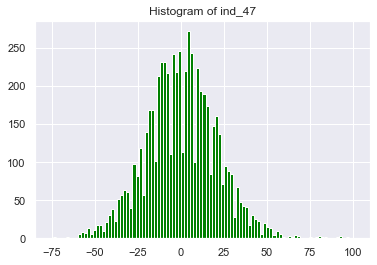

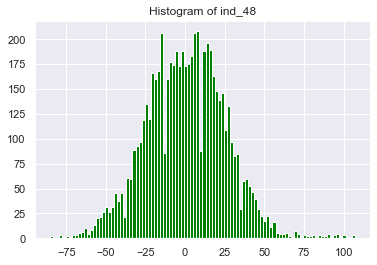

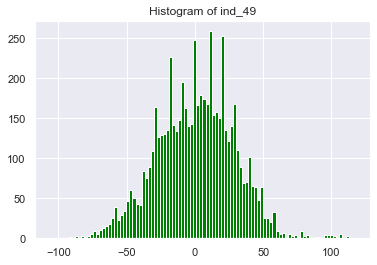

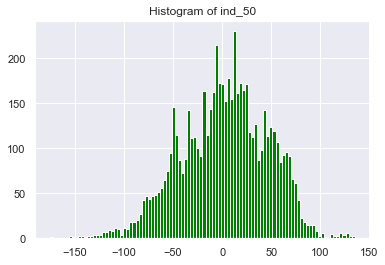

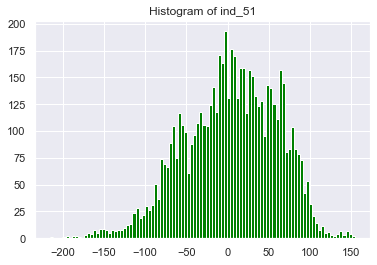

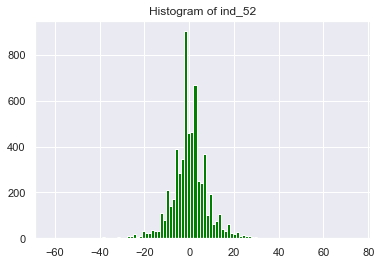

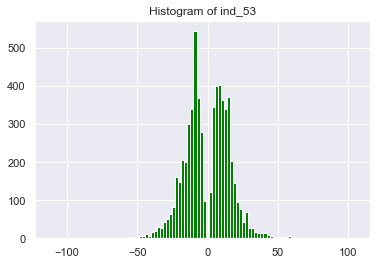

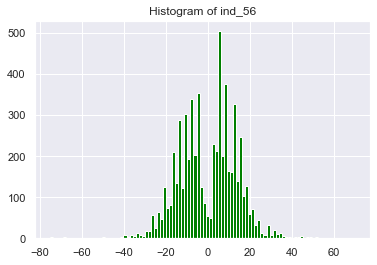

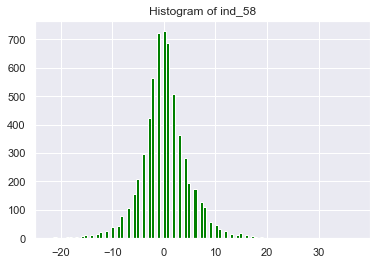

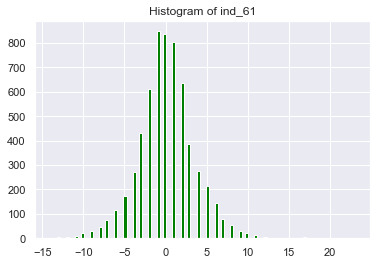

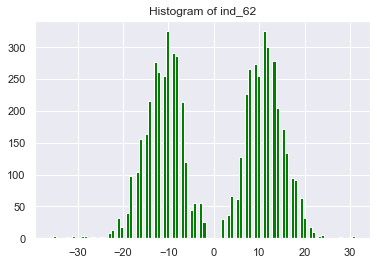

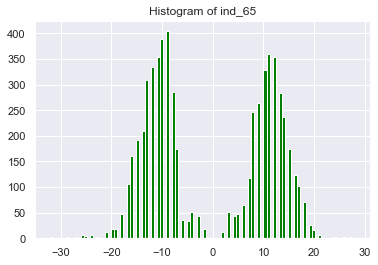

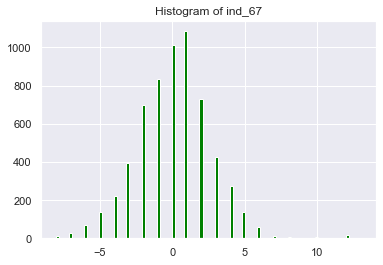

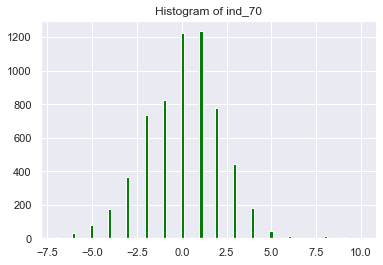

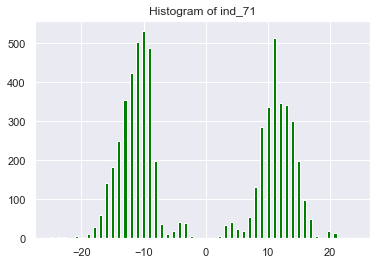

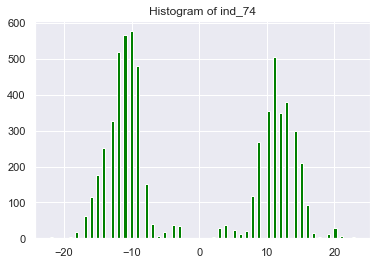

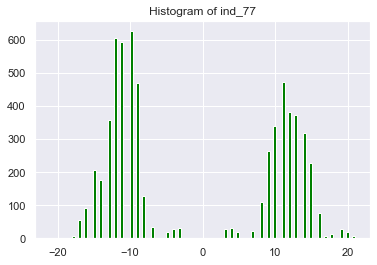

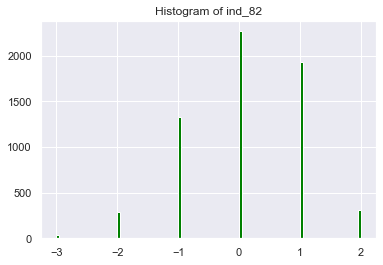

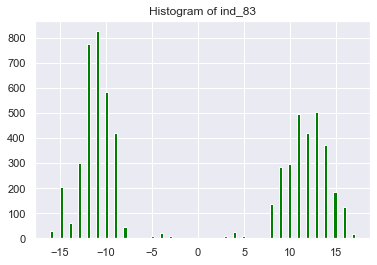

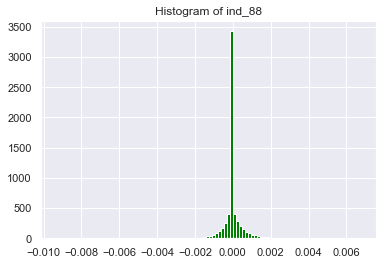

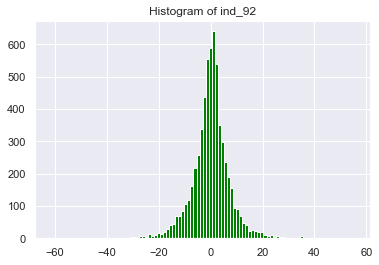

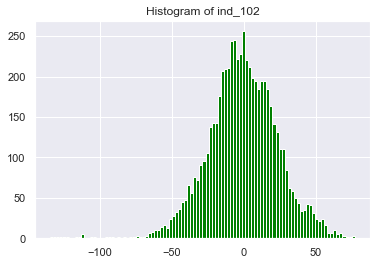

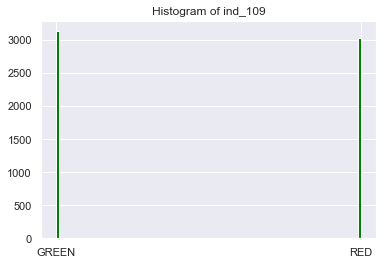

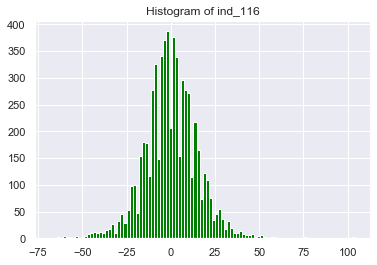

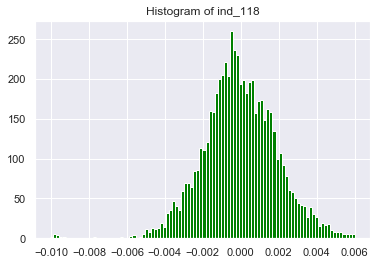

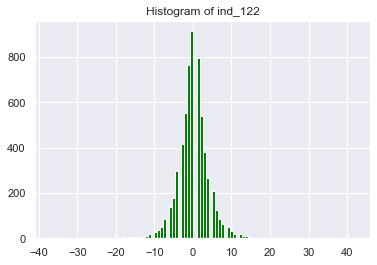

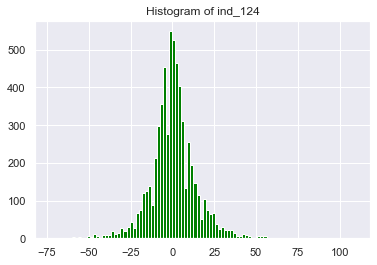

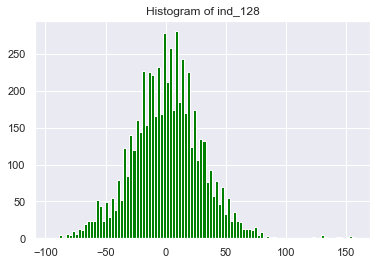

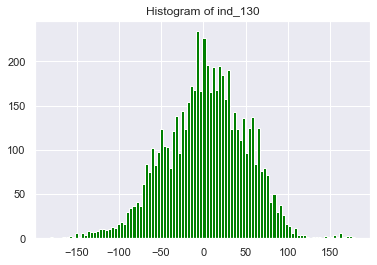

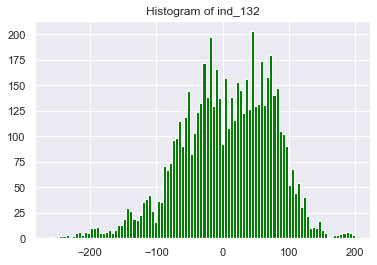

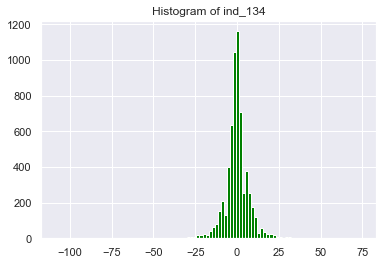

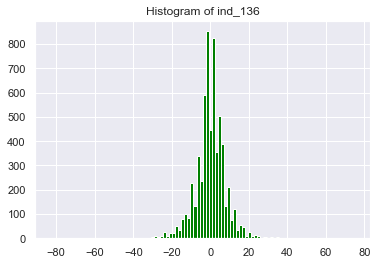

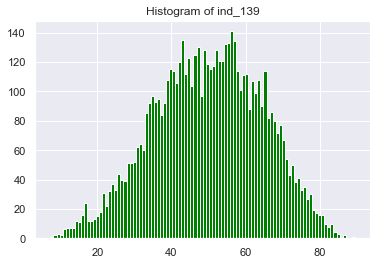

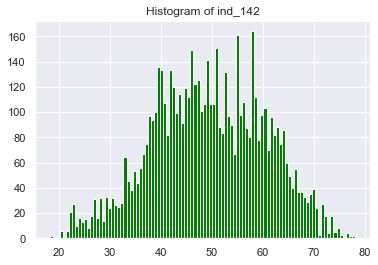

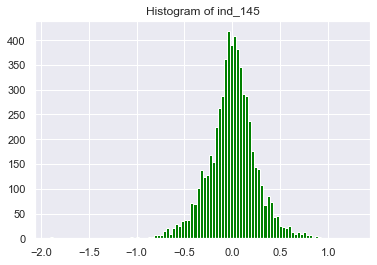

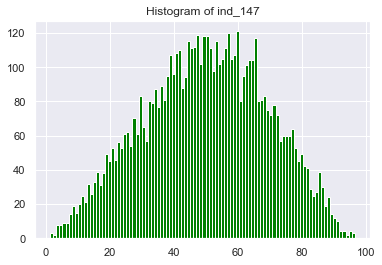

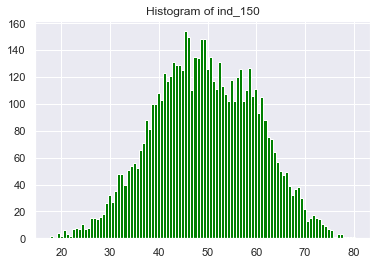

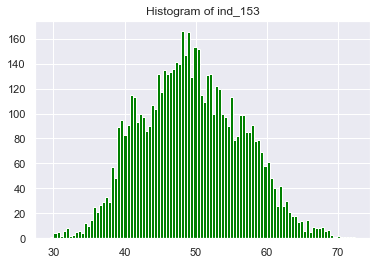

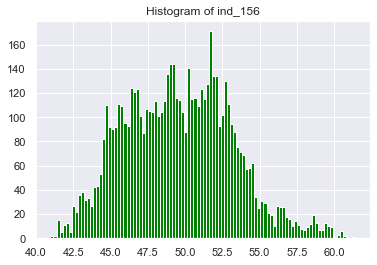

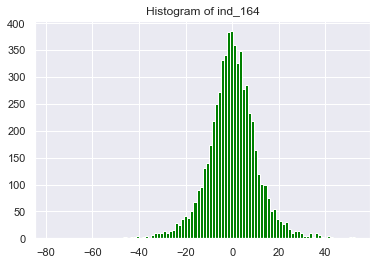

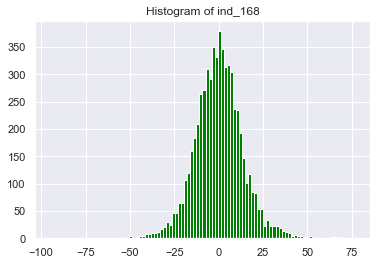

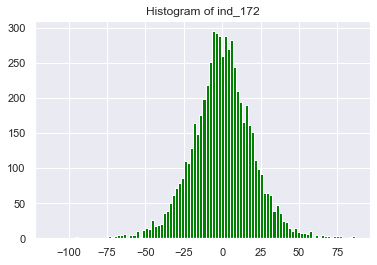

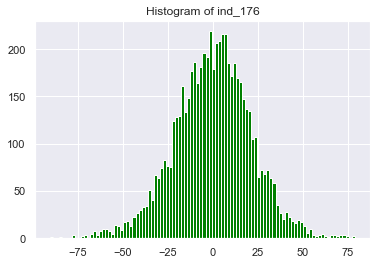

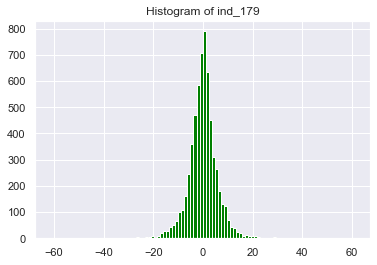

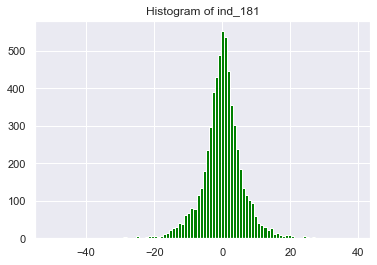

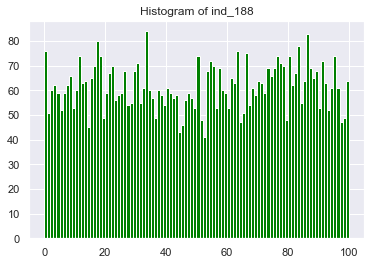

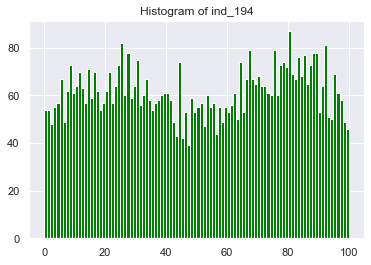

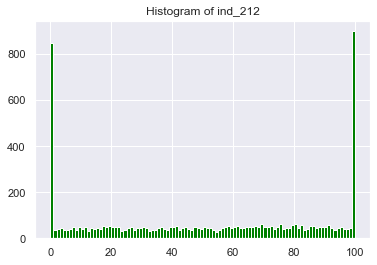

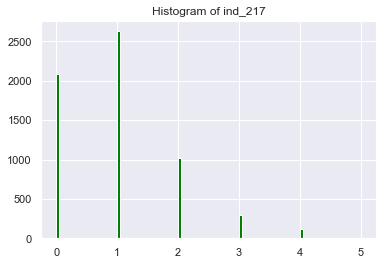

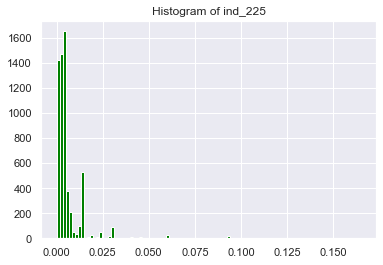

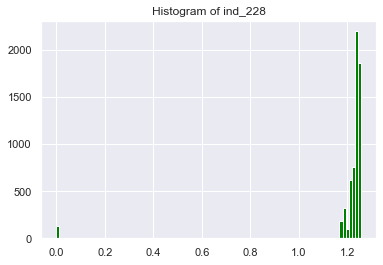

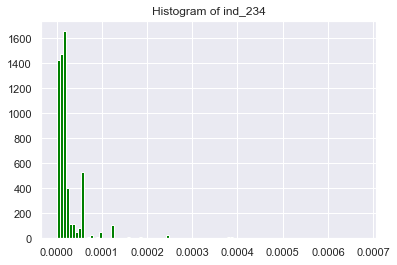

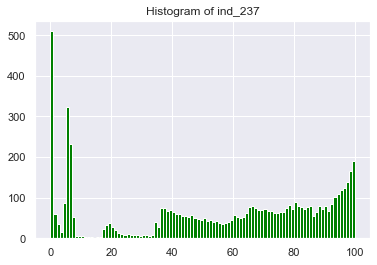

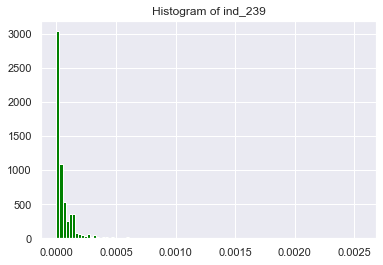

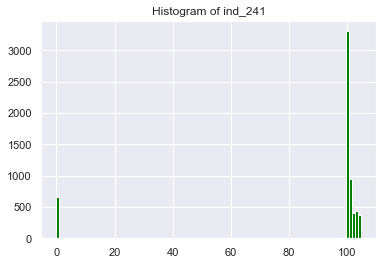

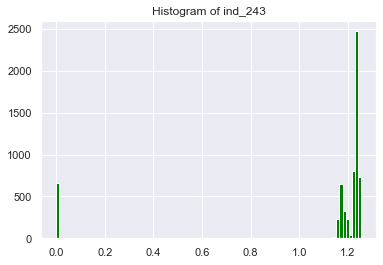

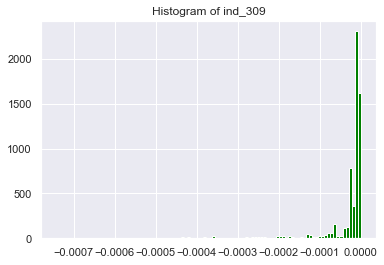

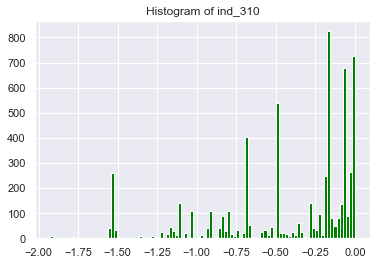

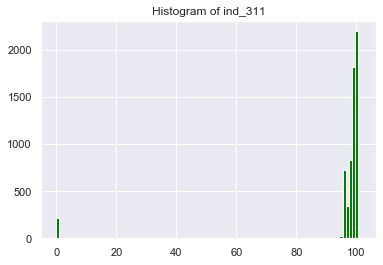

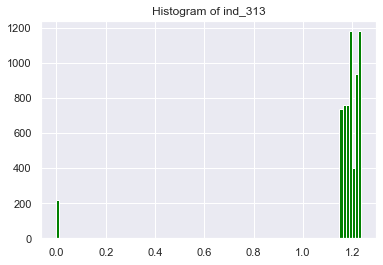

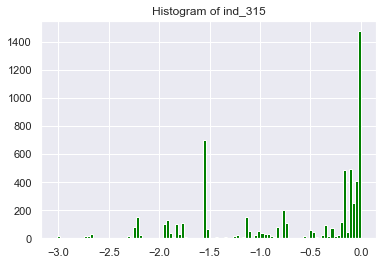

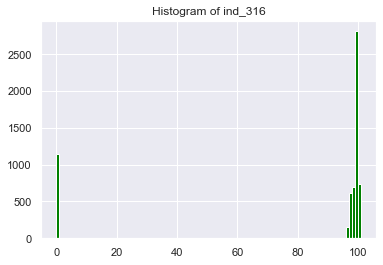

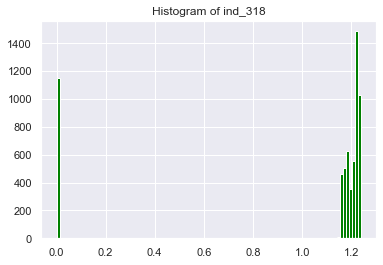

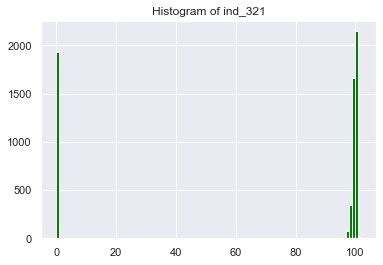

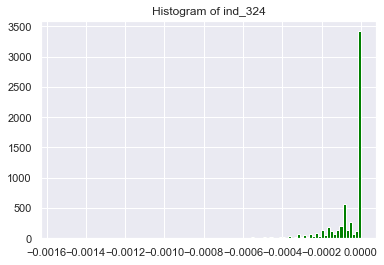

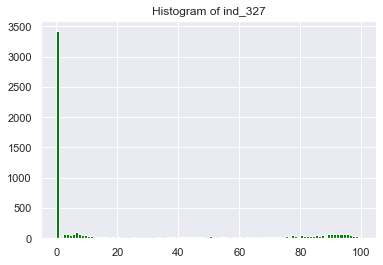

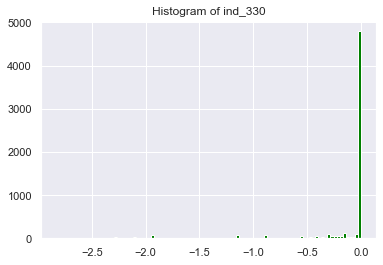

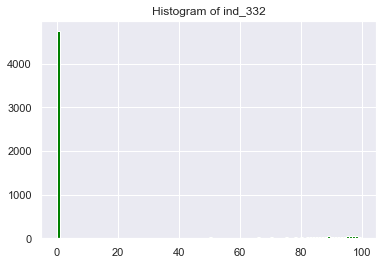

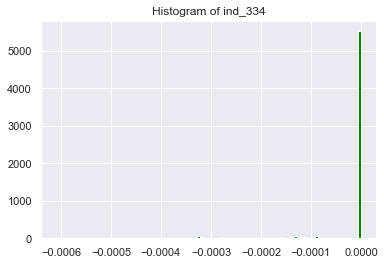

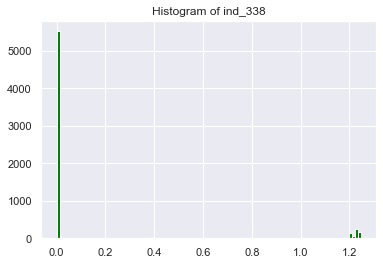

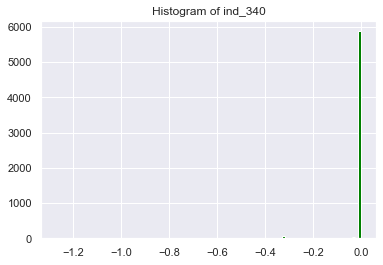

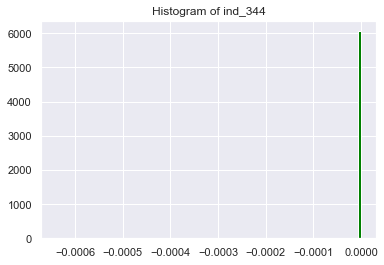

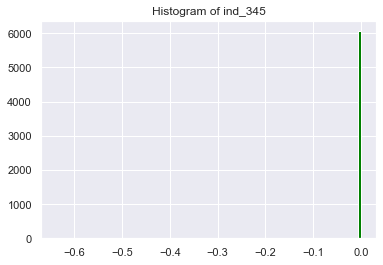

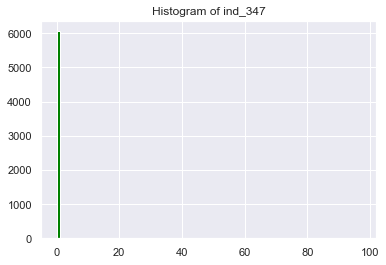

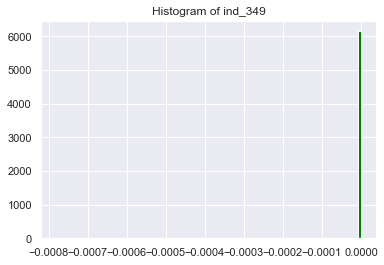

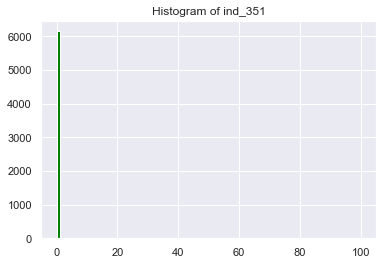

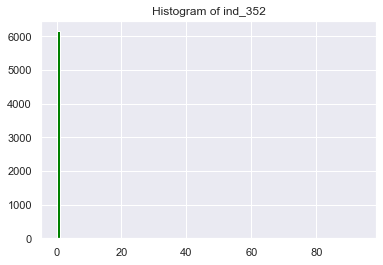

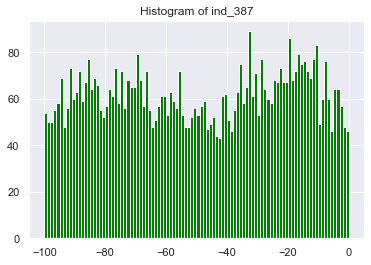

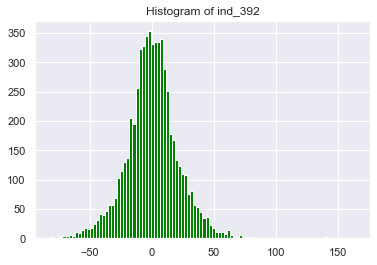

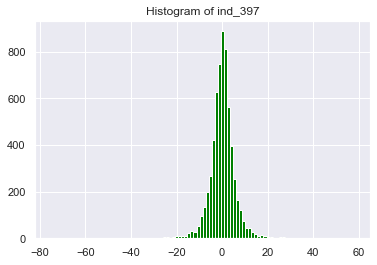

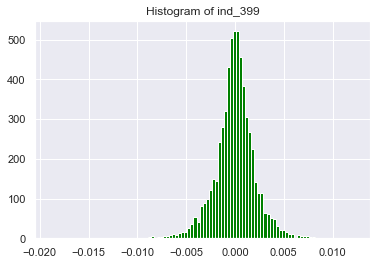

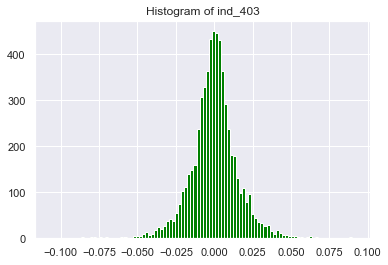

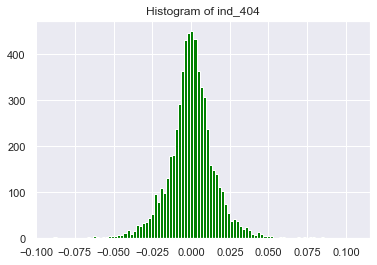

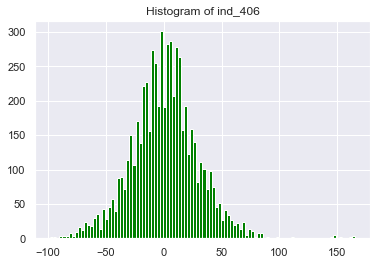

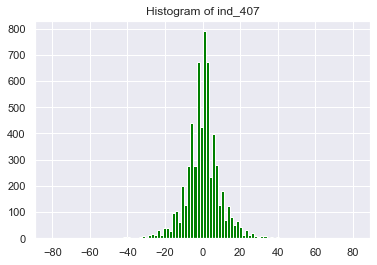

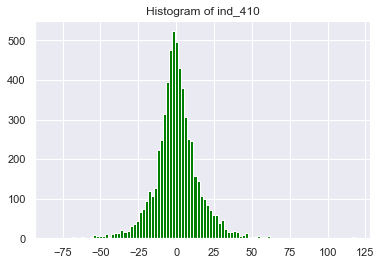

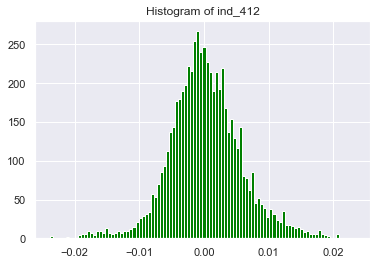

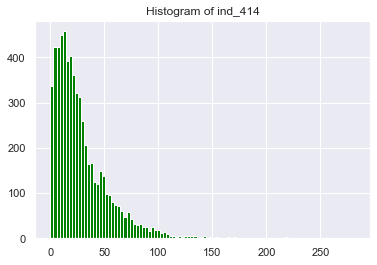

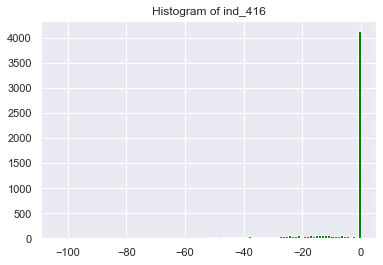

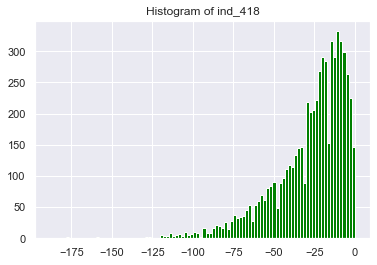

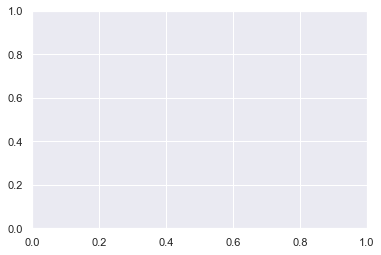

In [102]:
for i in data.columns:
    plt.figure()
    plt.hist(data[i],bins=100,color="green")
    plt.title("Histogram of "+ i)

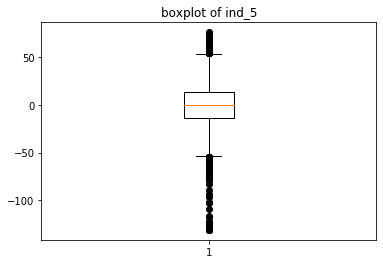

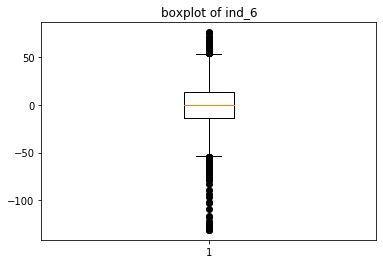

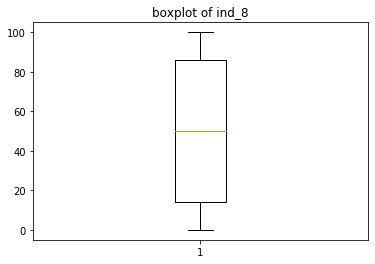

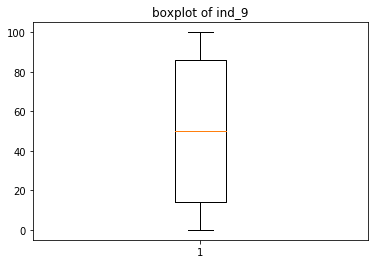

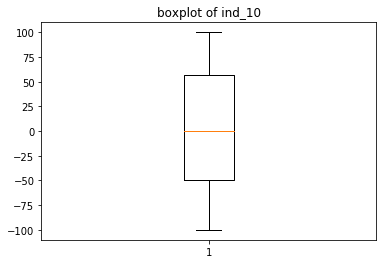

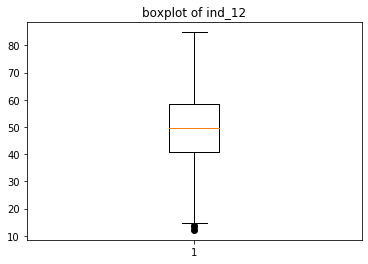

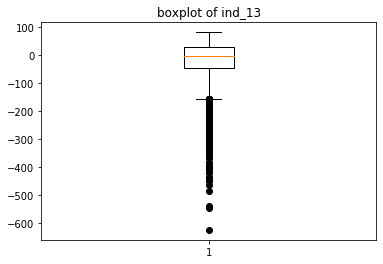

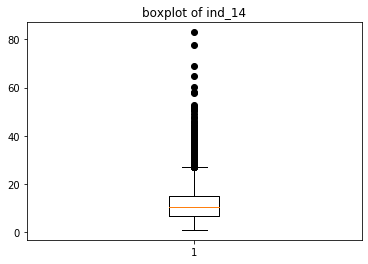

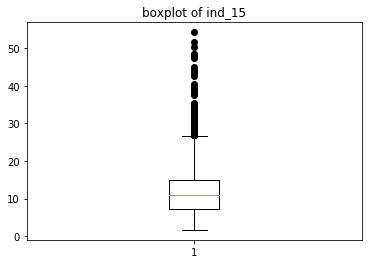

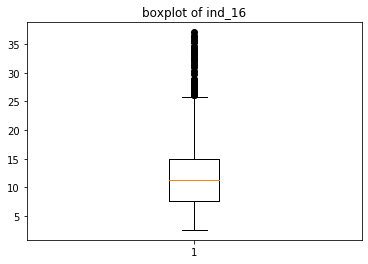

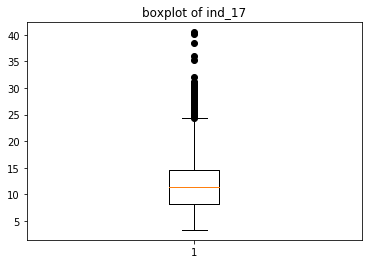

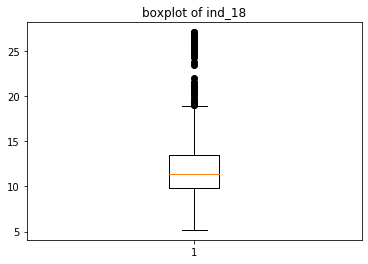

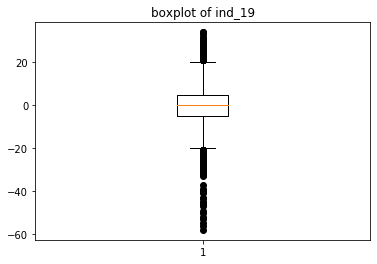

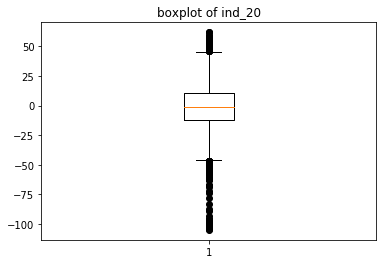

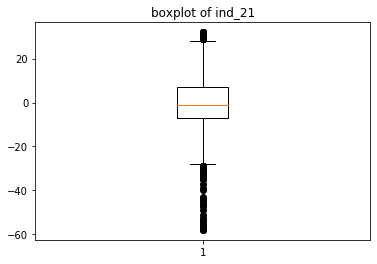

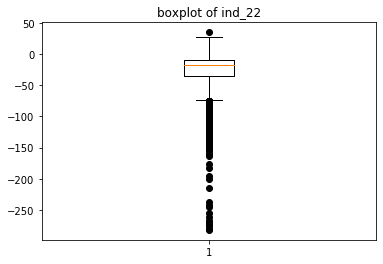

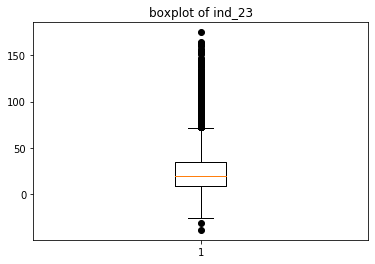

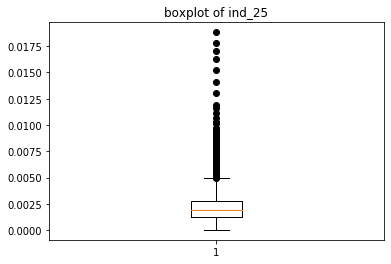

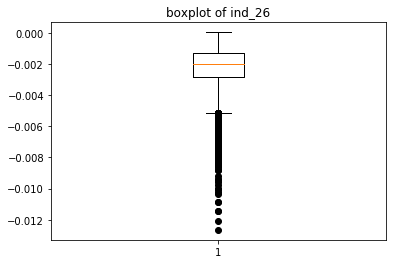

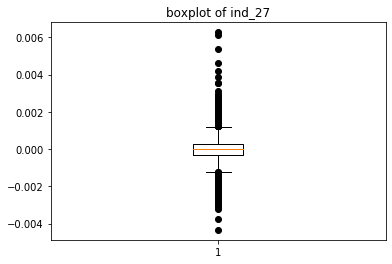

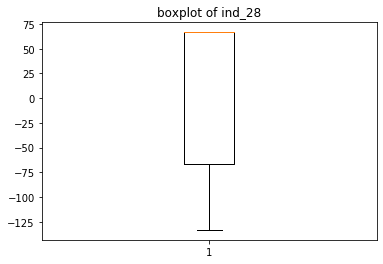

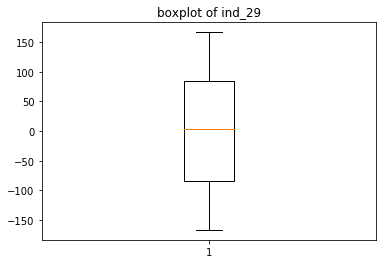

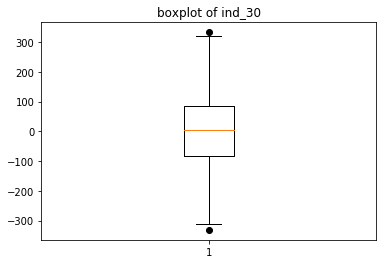

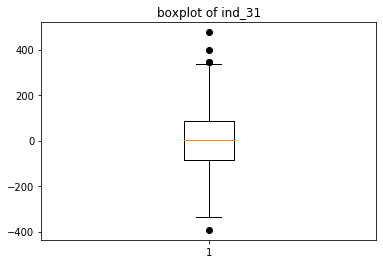

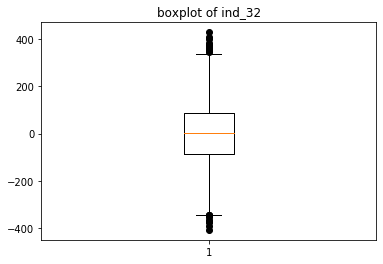

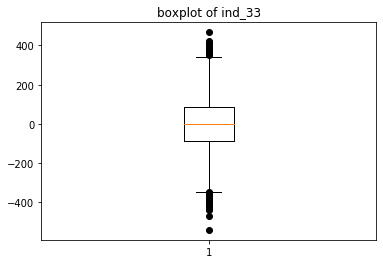

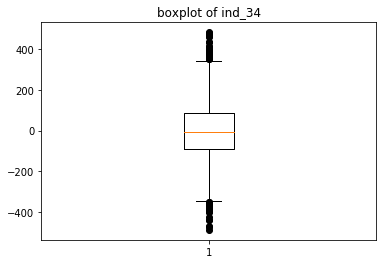

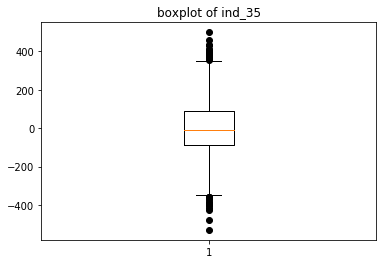

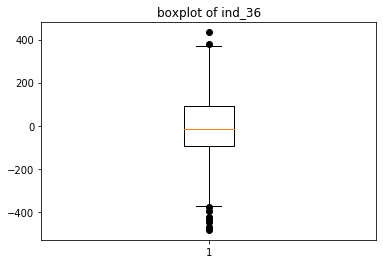

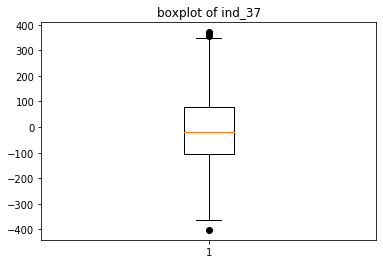

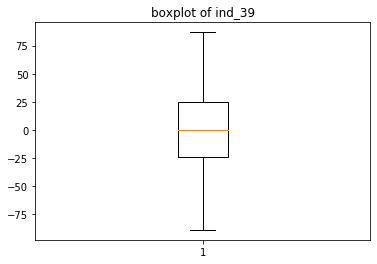

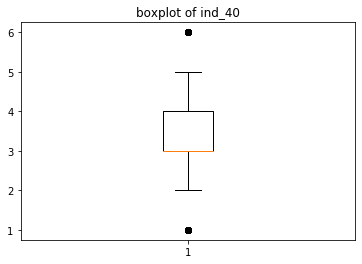

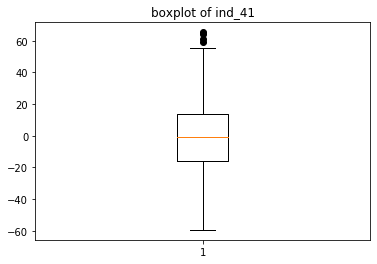

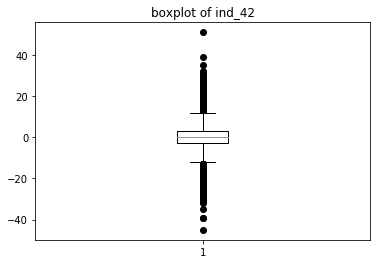

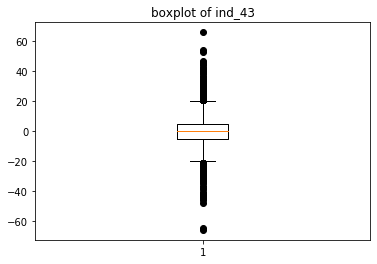

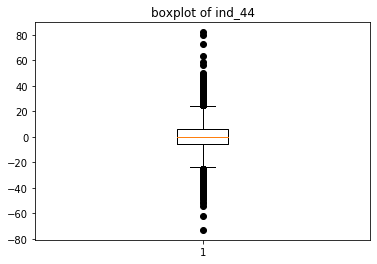

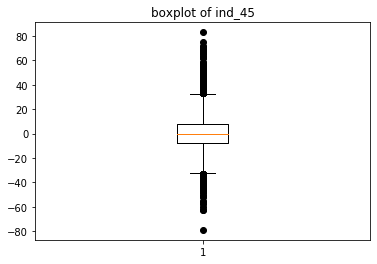

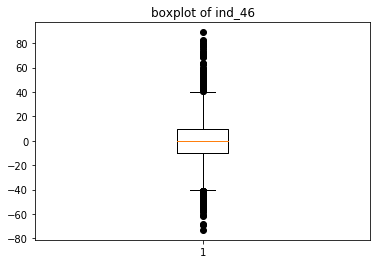

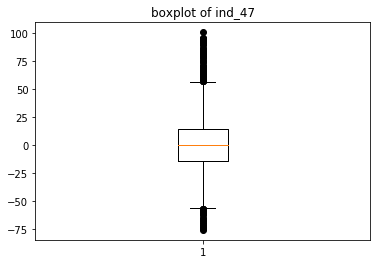

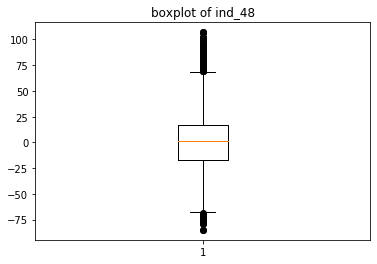

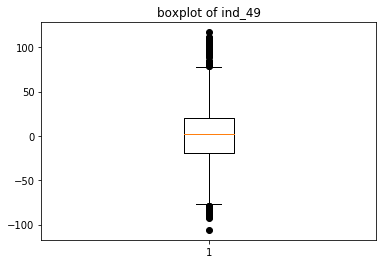

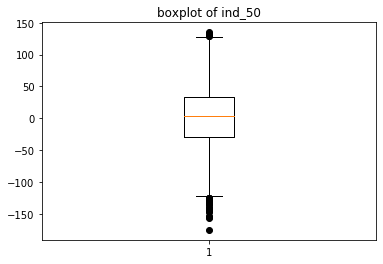

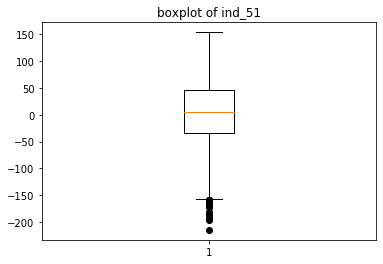

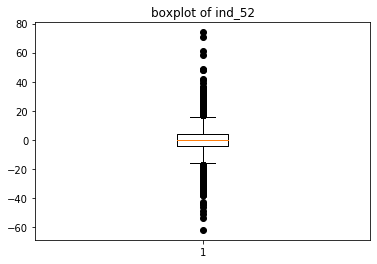

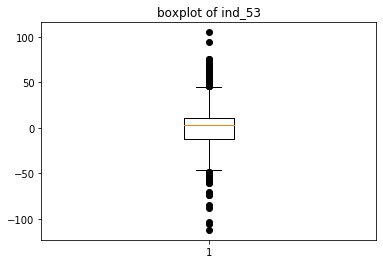

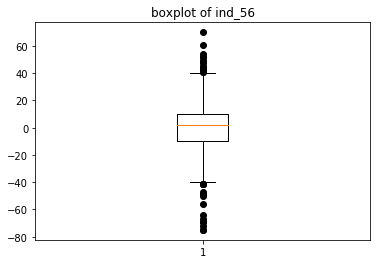

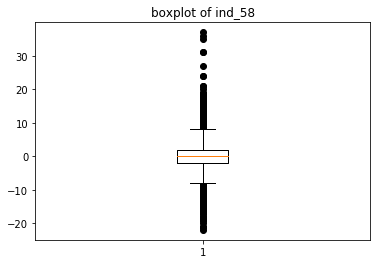

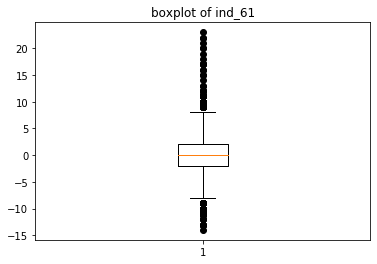

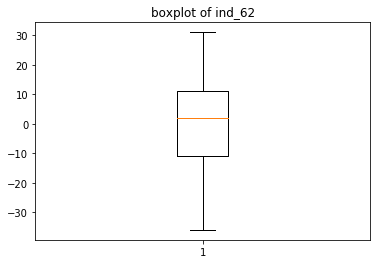

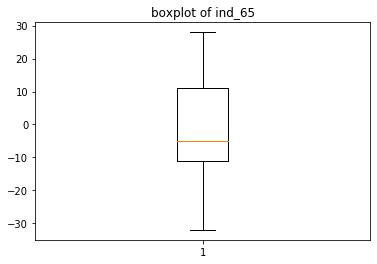

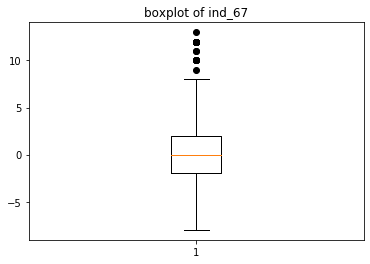

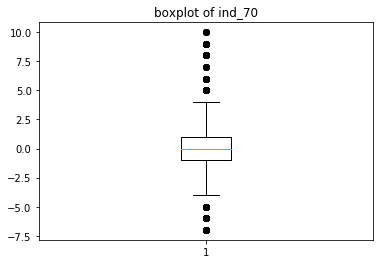

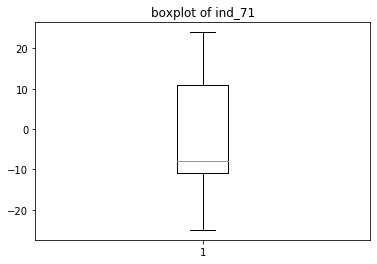

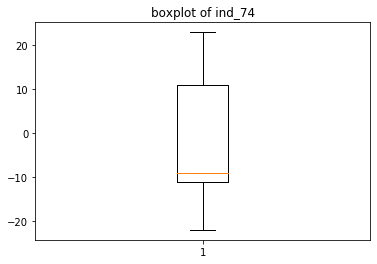

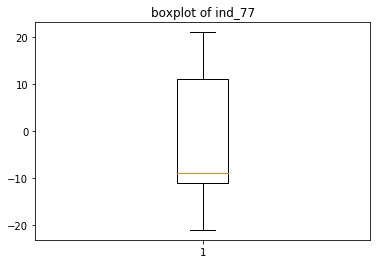

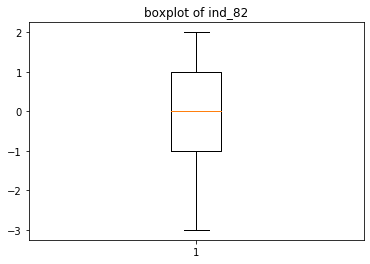

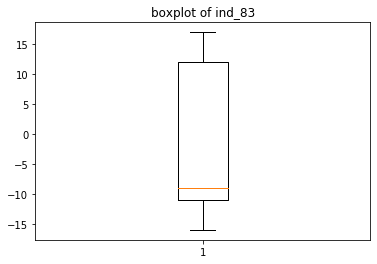

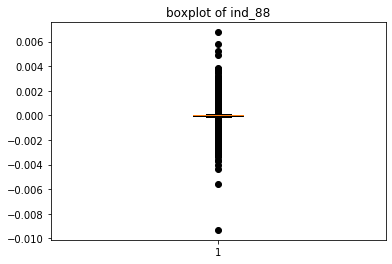

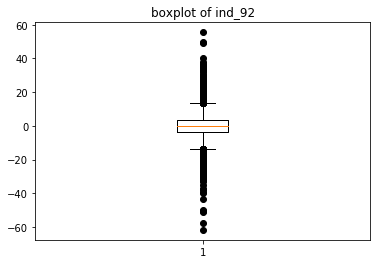

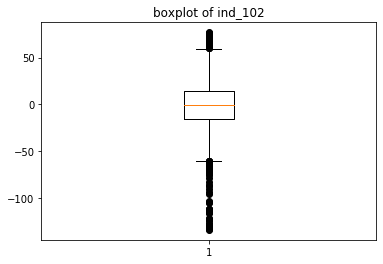

TypeError: unsupported operand type(s) for /: 'str' and 'int'

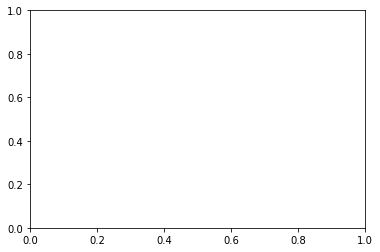

In [23]:
for i in data.columns:
    plt.boxplot(data[i].values,sym='ko')
    plt.title("boxplot of "+ i)
    plt.show()

In [159]:
for col in data.columns[1:]:           
    if data[col].dtypes != object:
        
        stat, p = shapiro(data[col])

        print('Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

        alpha = 0.05
        if p > alpha:
            print(col)
            print('\033[1m'+ col + '\033[0m','Örneklem Normal dağılımdan gelmektedir \n')
        else:
            print('\033[1m'+ col + ":"+'\033[0m','Örneklem Normal dağılımdan gelmemektedir \n')

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro Statistics=0.978, p=0.000
ind_6: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.892, p=0.000
ind_8: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.891, p=0.000
ind_9: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.941, p=0.000
ind_10: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.997, p=0.000
ind_12: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.838, p=0.000
ind_13: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.873, p=0.000
ind_14: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.928, p=0.000
ind_15: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.954, p=0.000
ind_16: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.962, p=0.000
ind_17: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.952, p=0.000
ind_18: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.974, p=0.000
ind_19: Örneklem Normal dağılımdan

ind_239: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.390, p=0.000
ind_241: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.413, p=0.000
ind_243: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.437, p=0.000
ind_309: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.838, p=0.000
ind_310: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.232, p=0.000
ind_311: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.266, p=0.000
ind_313: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.806, p=0.000
ind_315: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.493, p=0.000
ind_316: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.515, p=0.000
ind_318: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.591, p=0.000
ind_321: Örneklem Normal dağılımdan gelmemektedir 

Shapiro Statistics=0.600, p=0.000
ind_324: Örneklem Normal dağılımdan gelmemektedir 

Sh

In [5]:
pd.get_dummies(data,columns = ["ind_109"], prefix=["ind_109"]).head()

ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_420  ind_422  ind_424   ind_426   ind_428  \
0   17.62   11.73  ...     -152     -353      1.0  0.498547  0.701906   
1   18.16   12.22  ...     -158     -359      1.0  0.537088  0.690833   
2   17.86   12.28  ...     -160     -362      1.0  0.615169  0.693040   
3   14.76   12.61  ...     -166     -367      1.0  0.661517  0.673418   
4   11.92   14.25  ...     -186     -388      1.0  0.747204  0.700522   

   20_target  50_target  90_target  ind_109_GREEN  ind_109_RED  
0  15.135802  35.625252  36.997753              1            0  
1  15.143348  35.643013  37.016198              1            0  
2  15.146870  35.651301 -37.024805              1            0  
3  15.153283   0.000000 -37.040483              1            0  
4 -15.179065 -35.727079 -37.103503              1            0  

[5 rows x 137 columns]

In [6]:
a =  ['ind_109','ind_420', 'ind_422']
data1 = data.drop(labels=a, axis=1)

In [7]:
b = ['50_target','20_target']
data2 = data1.drop(labels=b, axis=1)

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X= data2.drop("90_target", axis = 1).astype("float64")
y= data2["90_target"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.20, random_state=0, shuffle = False)

In [9]:
training = data2.copy()
training.shape

(6167, 131)

In [48]:
lm= smf.OLS(y_train.astype(float), X_train.astype(float))

In [49]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.241
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              11.70
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                   1.31e-199
Time:                        01:03:23   Log-Likelihood:                         -24168.
No. Observations:                4933   AIC:                                  4.860e+04
Df Residuals:                    4803   BIC:                                  4.944e+04
Df Model:                         130                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.9555      0.871      1.097      0.273      -0.753       2.664
ind_6          0.3863      0.708      0.545      0.586      -1.002       1.775
ind_8      -3.606e+08   1.36e+08     -2.653      0.008   -6.27e+08   -9.42e+07
ind_9       3.606e+08   1.36e+08      2.653      0.008    9.42e+07    6.27e+08
ind_10      3.606e+08   1.36e+08      2.653      0.008    9.42e+07    6.27e+08
ind_12         5.3754      2.064      2.604      0.009       1.329       9.422
ind_13        -0.0254      0.027     -0.944      0.345      -0.078       0.027
ind_14        -0.0559      0.179     -0.312      0.755      -0.407       0.295
ind_15        -0.1591      0.259     -0.614      0.540      -0.667       0.349
ind_16         0.0165      0.384      0.043      0.966      -0.737       0.770
ind_17         1.3562      0.418      3.246      0.001       0.537       2.175
ind_18         1.5165      0.306      4.955      0.000       0.916       2.116
ind_19         1.1730      1.344      0.873      0.383      -1.461       3.807
ind_20        -0.4979      1.084     -0.459      0.646      -2.623       1.627
ind_21         0.8801      1.292      0.681      0.496      -1.652       3.413
ind_22        -0.0433      0.334     -0.130      0.897      -0.698       0.611
ind_23         0.0503      0.339      0.148      0.882      -0.615       0.716
ind_25     -1.707e+06   1.02e+06     -1.672      0.095   -3.71e+06    2.95e+05
ind_26     -1.706e+06   1.02e+06     -1.670      0.095   -3.71e+06    2.96e+05
ind_27      3.408e+06   2.04e+06      1.669      0.095   -5.96e+05    7.41e+06
ind_28         0.0032      0.012      0.271      0.786      -0.020       0.027
ind_29        -0.0375      0.019     -2.006      0.045      -0.074      -0.001
ind_30        -0.0169      0.021     -0.804      0.421      -0.058       0.024
ind_31         0.0642      0.029      2.241      0.025       0.008       0.120
ind_32        -0.0436      0.027     -1.606      0.108      -0.097       0.010
ind_33         0.0190      0.026      0.728      0.467      -0.032       0.070
ind_34         0.0100      0.029      0.340      0.734      -0.048       0.068
ind_35        -0.0280      0.024     -1.180      0.238      -0.074       0.018
ind_36         0.0348      0.017      2.015      0.044       0.001       0.069
ind_37     -3.872e-05      0.018     -0.002      0.998      -0.034       0.034
ind_39        -0.1546      0.085     -1.824      0.068      -0.321       0.012
ind_40         0.1450      1.339      0.108      0.914      -2.479       2.769
ind_41         0.1410      0.077      1.827      0.068      -0.010       0.292
ind_42         0.3056      0.383      0.798      0.425      -0.446       1.057
ind_43         0.3007      0.259      1.159      0.247      -

In [50]:
model.params

ind_5      9.555200e-01
ind_6      3.863139e-01
ind_8     -3.606495e+08
ind_9      3.606495e+08
ind_10     3.606495e+08
               ...     
ind_416    3.417921e-01
ind_418   -1.301638e-01
ind_424    2.981788e+00
ind_426    2.218946e+00
ind_428   -4.557162e+01
Length: 130, dtype: float64

In [51]:
model.conf_int()

0             1
ind_5   -7.526098e-01  2.663650e+00
ind_6   -1.002304e+00  1.774932e+00
ind_8   -6.271265e+08 -9.417251e+07
ind_9    9.417251e+07  6.271265e+08
ind_10   9.417251e+07  6.271265e+08
...               ...           ...
ind_416  2.626417e-01  4.209425e-01
ind_418 -3.216232e-01  6.129566e-02
ind_424 -1.157064e+00  7.120640e+00
ind_426 -9.350063e+00  1.378796e+01
ind_428 -6.659820e+01 -2.454505e+01

[130 rows x 2 columns]

In [52]:
model.rsquared_adj

0.21996031439661146

In [53]:
model.fittedvalues[0:5]

0    -4.311365
1     0.729418
2    -7.202564
3    -6.142916
4   -11.570747
dtype: float64

In [54]:
y[0:5]

0    36.997753
1    37.016198
2   -37.024805
3   -37.040483
4   -37.103503
Name: 90_target, dtype: float64

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
X= data2.drop("90_target", axis = 1).astype("float64")
y= data2["90_target"]
reg = LinearRegression()

In [57]:
model = reg.fit(X,y)

In [58]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
model.intercept_

210.71299618406147

In [60]:
model.coef_

array([ 1.20064717e+00,  3.15273448e-01, -3.66323683e+08,  3.66323684e+08,
        3.66323683e+08,  2.62907157e+00,  5.07029706e-02,  3.38487100e-02,
       -7.41280292e-02, -1.54146666e-01,  4.82198236e-01,  1.54403276e+00,
        7.35592872e-01, -3.55098337e-01,  7.08119348e-01, -8.98231566e-03,
       -4.21249382e-02, -1.01526866e+06, -1.01564347e+06,  2.02711414e+06,
       -2.84717977e-03, -1.91428736e-02, -1.68788135e-02,  6.64452910e-02,
       -4.94754612e-02,  4.56545651e-02,  4.89172339e-03, -4.48478609e-02,
       -5.65828383e-03,  1.01759404e-01, -8.28440562e-02, -1.46998213e+00,
        1.76273949e-01,  3.37388199e-01,  3.60561393e-01, -1.32583190e-01,
       -1.84590699e-01, -6.70366548e-02,  8.24737236e-01,  1.24231264e-01,
       -1.47013068e-01,  1.05709039e+00, -3.86161163e-01, -1.39897943e-01,
       -3.12515870e-02,  8.93800743e-02,  2.52232353e+00,  6.85417704e-01,
       -1.44121755e-01, -5.54122478e-02, -1.42503161e-01,  2.86164689e+00,
        2.14304836e-01, -

In [61]:
model.score(X,y)

0.1731990013299196

In [62]:
model.predict(X)[0:10]

array([-15.66789454, -12.53556495, -20.82712068, -21.13312537,
       -24.4540423 , -32.17642491, -28.33329784, -37.2346972 ,
       -24.57202697, -27.33398884])

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
print(" mse: ",(mean_squared_error(y_train, model.predict(X_train))))
print(" rmse: ",np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

 mse:  1111.472506630725
 rmse:  33.33875382540153


In [64]:
k_t= pd.DataFrame({"gercek_y": y[0:10], "tahmin_y": reg.predict(X)[0:10]})
k_t

gercek_y   tahmin_y
0  36.997753 -15.667895
1  37.016198 -12.535565
2 -37.024805 -20.827121
3 -37.040483 -21.133125
4 -37.103503 -24.454042
5 -37.098277 -32.176425
6 -37.096740 -28.333298
7 -37.088440 -37.234697
8 -37.069073 -24.572027
9 -37.074913 -27.333989

In [65]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

gercek_y   tahmin_y       hata
0  36.997753 -15.667895  52.665647
1  37.016198 -12.535565  49.551762
2 -37.024805 -20.827121 -16.197684
3 -37.040483 -21.133125 -15.907358
4 -37.103503 -24.454042 -12.649460
5 -37.098277 -32.176425  -4.921852
6 -37.096740 -28.333298  -8.763442
7 -37.088440 -37.234697   0.146258
8 -37.069073 -24.572027 -12.497046
9 -37.074913 -27.333989  -9.740925

In [66]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

gercek_y   tahmin_y       hata    hata_kare
0  36.997753 -15.667895  52.665647  2773.670403
1  37.016198 -12.535565  49.551762  2455.377163
2 -37.024805 -20.827121 -16.197684   262.364980
3 -37.040483 -21.133125 -15.907358   253.044031
4 -37.103503 -24.454042 -12.649460   160.008850
5 -37.098277 -32.176425  -4.921852    24.224625
6 -37.096740 -28.333298  -8.763442    76.797913
7 -37.088440 -37.234697   0.146258     0.021391
8 -37.069073 -24.572027 -12.497046   156.176147
9 -37.074913 -27.333989  -9.740925    94.885611

In [67]:
np.sum(k_t["hata_kare"])

6256.571114170366

In [68]:
np.mean(k_t["hata_kare"])

625.6571114170364

## PCA

In [69]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
pca = PCA()

In [70]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[ 1.20368535e+01, -3.50121234e+00,  6.32927327e+00,
        -1.47885146e+00, -3.94351538e-01,  7.25570227e-01,
        -2.22161377e+00, -4.41366789e-01,  1.72513121e+00,
        -2.49063524e+00,  6.08186483e-01,  2.55502455e-01,
         4.16254297e-01,  2.89351244e-01, -1.32603326e+00,
         3.19877349e+00,  1.29548748e+00, -8.28809598e-01,
         4.96076172e+00,  2.84549494e-01,  1.21225412e+00,
        -7.41966895e-01,  1.00221007e+00,  8.96078038e-01,
        -2.56342919e-01,  1.81176255e+00,  5.91353611e-03,
        -1.24283860e-02, -1.76423733e-01, -7.36459373e-01,
        -2.73635684e-01, -9.26566216e-01, -4.07800232e-03,
        -1.63308479e-01,  4.10553965e-02,  9.54023186e-01,
         1.03476096e+00, -2.28839347e-01, -3.00498477e-01,
        -1.29631003e+00,  4.67428913e-01,  2.71428166e-01,
        -5.58229560e-01, -1.42358154e+00,  1.71140829e+00,
         6.79233928e-01,  7.01771659e-01,  2.85706917e-01,
         7.56868533e-01,  1.80503907e-01,  9.18205211e-0

In [71]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([37.44, 49.87, 56.2 , 60.67, 63.91, 67.08, 69.83, 71.93, 73.62,
       75.2 , 76.66, 78.02, 79.29, 80.48, 81.61, 82.69, 83.66, 84.57,
       85.43, 86.2 , 86.96, 87.68, 88.36, 88.98, 89.56, 90.12, 90.66,
       91.16, 91.61, 92.05, 92.47, 92.87, 93.26, 93.61, 93.95, 94.27,
       94.57, 94.87, 95.15, 95.41, 95.65, 95.88, 96.1 , 96.31, 96.51,
       96.7 , 96.88, 97.04, 97.2 , 97.35, 97.5 , 97.64, 97.77, 97.89,
       98.01, 98.12, 98.22, 98.32, 98.41, 98.5 , 98.59, 98.67, 98.75,
       98.82, 98.89, 98.96, 99.03, 99.09, 99.14, 99.19, 99.24, 99.29,
       99.33, 99.37, 99.41, 99.45, 99.49, 99.52, 99.55, 99.58, 99.61,
       99.64, 99.67, 99.7 , 99.72, 99.74, 99.76, 99.78, 99.8 , 99.82,
       99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9 , 99.91, 99.92,
       99.93, 99.94, 99.95, 99.96, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97,

([<matplotlib.axis.XTick at 0xfb49048>,
 <a list of 130 Text xticklabel objects>)

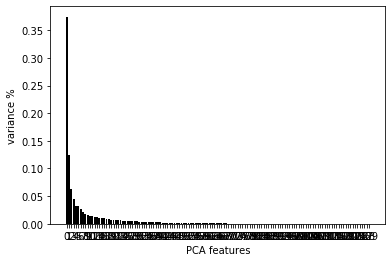

In [72]:
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [74]:
pca = PCA(n_components=14)
X_reduced_train = pca.fit_transform(scale(X_train))
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [75]:
pcr_model.intercept_

-3.976352400904117

In [76]:
pcr_model.coef_

array([ 0.31526662,  0.61020622,  1.18749749,  0.99344925, -1.0272357 ,
       -0.84369465,  0.00453106, -0.04150389,  0.04493606,  0.16834418,
        2.12824232,  1.1972356 , -2.02240409, -2.23182568])

In [77]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([3.4401419 , 2.38209031, 1.70523193, 0.7663696 , 4.34303852])

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

36.212640575216504

In [79]:
data2["90_target"].mean()

-3.315072358419006

In [80]:
r2_score(y_train, y_pred)

0.04460774944999535

In [82]:
pca2 = PCA(n_components=14)
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

36.296859909404205

In [83]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:14], y_train)
pcr_model.intercept_


-3.976352400904117

In [84]:
pcr_model.coef_

array([ 0.31526662,  0.61020622,  1.18749749,  0.99344925, -1.0272357 ,
       -0.84369465,  0.00453106, -0.04150389,  0.04493606,  0.16834418,
        2.12824232,  1.1972356 , -2.02240409, -2.23182568])

In [85]:
y_pred = pcr_model.predict(X_reduced_train[:,0:14])
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = pcr_model.predict(X_reduced_test[:,0:14])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

36.212640575216504
36.296859909404205


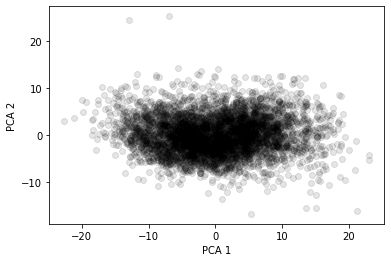

In [86]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

## CART

In [87]:
y = data2["90_target"]
X = data2.drop(["90_target"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
#yalnızca 5 adet dallanma yaptım
cart_model = DecisionTreeRegressor(max_leaf_nodes=5)

In [90]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

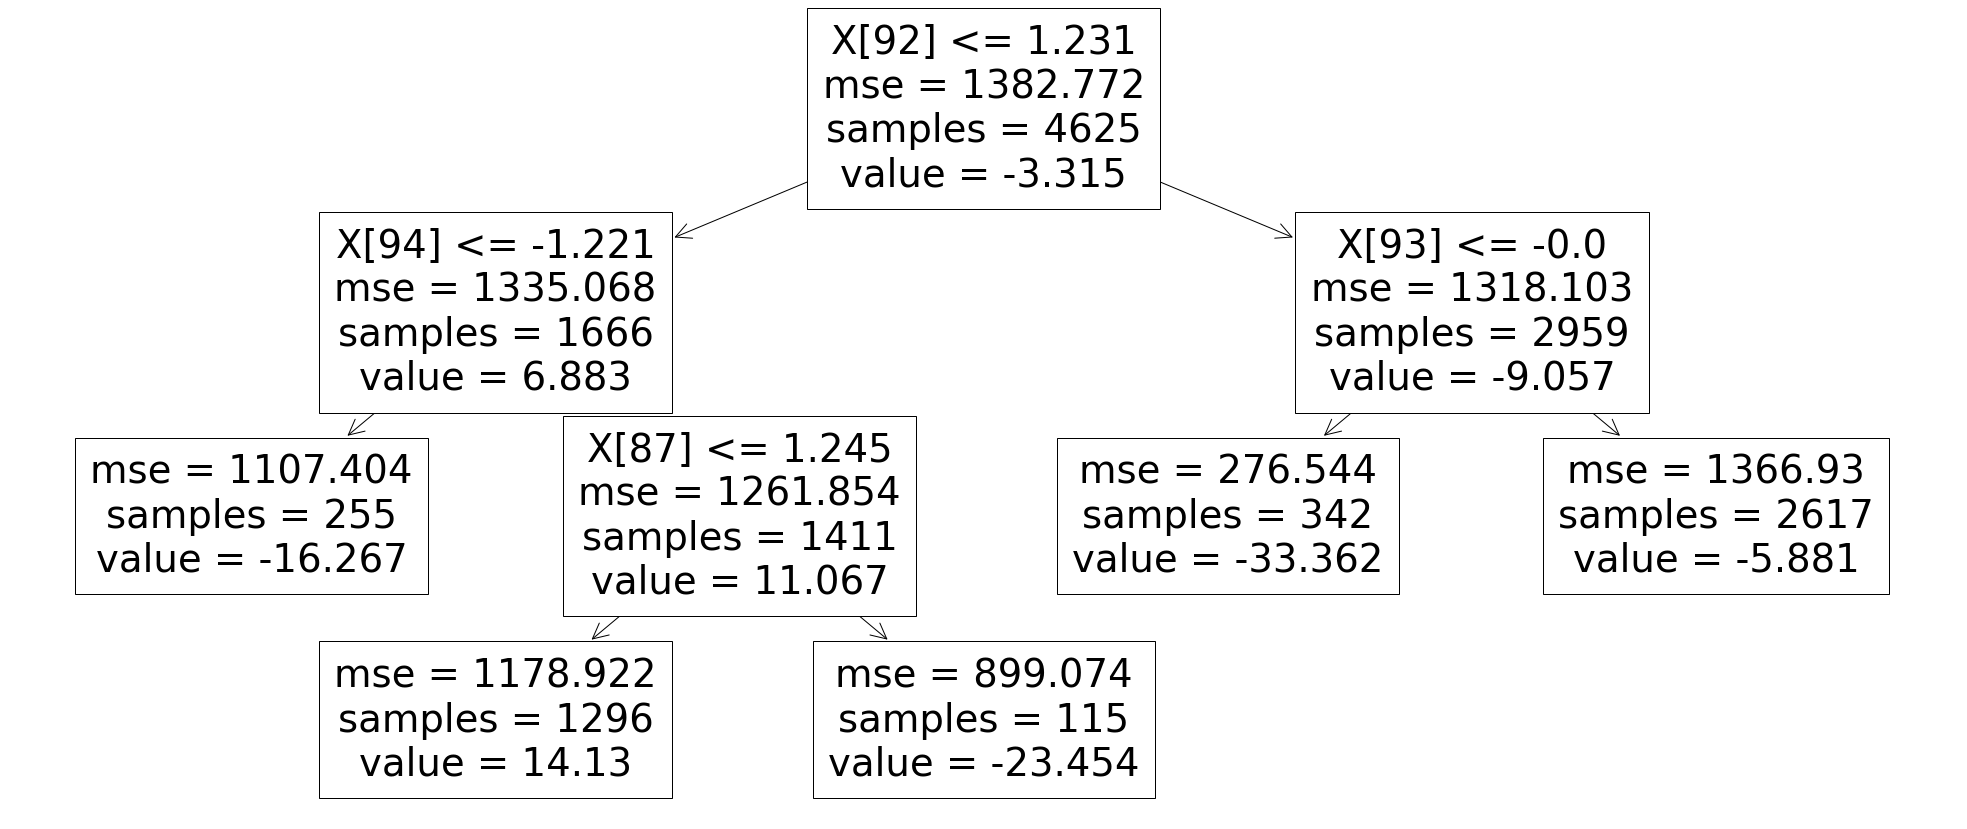

In [91]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_model);

In [92]:
!pip install skompiler 

In [93]:
from skompiler import skompile
print(skompile(cart_model.predict))

(if (x[92] <= 1.2306787967681885) then (if (x[94] <= -1.2205229997634888) then -16.267126502980393 else (if (x[87] <= 1.2454755902290344) then 14.129866189344128 else -23.453604505652176)) else (if (x[93] <= -2.9099999665049836e-05) then -33.36233947114035 else -5.881028767317542))


## Tahmin

In [94]:
X = [25]

In [95]:
(if (x[0] <= 49.5) then (if (x[0] <= -49.5) then -17.74853850203704 else (if (x[0] <= 16.5) then (if (x[0] <= -14.5) then -1.0708316051224316 else -5.6265103397960825) else 0.4456703531220649)) else 18.99564247297873)

SyntaxError: invalid syntax (<ipython-input-95-eea787a1300b>, line 1)

In [96]:
cart_model.predict(X_test)[0:5]

array([14.12986619, 14.12986619, 14.12986619, 14.12986619, 14.12986619])

In [97]:
y_pred = cart_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

34.75161931187665

## Model Tuning

In [98]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

47.19388092282817

In [99]:
cart_params = {"min_samples_split": range(2,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,10)}

In [100]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10, n_jobs=-1, verbose=2)

In [101]:
cart_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 |

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': range(4, 10),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_sp

In [102]:
cart_cv_model.best_params_

{'max_leaf_nodes': 5, 'min_samples_leaf': 10, 'min_samples_split': 41}

In [103]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=5, 
                                   min_samples_leaf=10, 
                                   min_samples_split=41)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

39.63069027819704

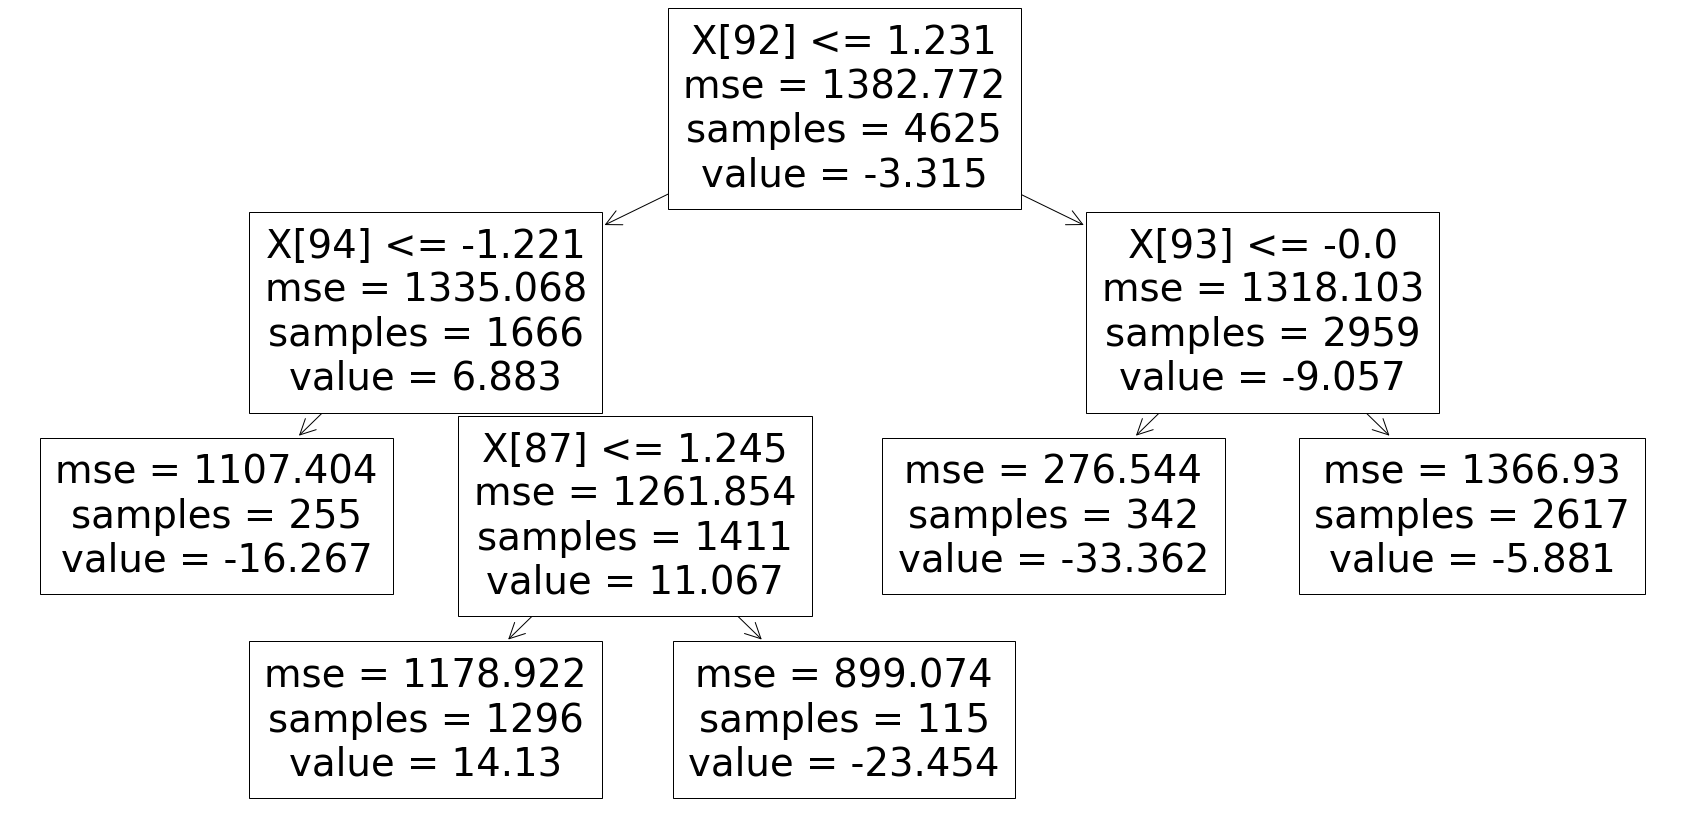

In [104]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

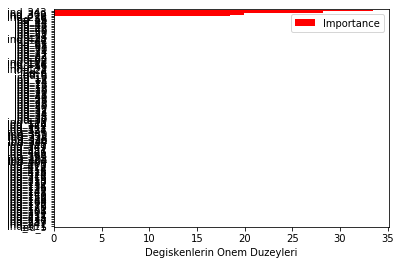

In [105]:
importance = pd.DataFrame({"Importance": cart_tuned.feature_importances_*100},
                          index=X_train.columns)
importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r", width=0.9)
plt.xlabel("Degiskenlerin Onem Duzeyleri")
plt.show()

## Random Forest

In [106]:
y = data2["90_target"]
X = data2.drop(["90_target"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Tahmin

In [109]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

38.317502250489525

In [111]:
rf_params = {"max_depth": list(range(1,5)),
              "max_features": [3,5,7],
              "n_estimators": [10,20,50]}
rf_model = RandomForestRegressor(random_state=42)

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [112]:
rf_cv_model.best_params_

{'max_depth': 4, 'max_features': 3, 'n_estimators': 10}

In [113]:
rf_tuned = RandomForestRegressor(max_depth=4,
                                  max_features=3,
                                  n_estimators=10)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

36.192269450673635

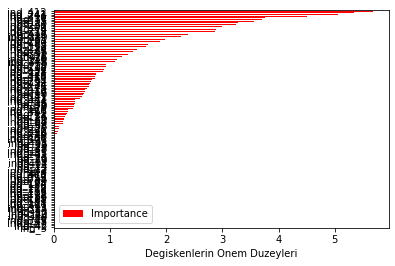

In [114]:
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index=X_train.columns)
importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Degiskenlerin Onem Duzeyleri")
plt.show()

## Neural Networks 

In [115]:
y = data2["90_target"]
X = data2.drop(["90_target"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle = False)

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [117]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(50,20)).fit(X_train_scaled, y_train)
mlp_model

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [118]:
#katman sayısı
mlp_model.n_layers_

4

In [119]:
mlp_model.hidden_layer_sizes

(50, 20)

## Tahmin

In [120]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

53.39183992281032

## Model Tuning

In [121]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [122]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

In [123]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 138.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 240.9min finished
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(50, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation

In [124]:
mlp_cv_model.best_params_

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (20, 20)}

In [125]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (20, 20))

In [126]:
mlp_tuned.fit(X_train_scaled, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [127]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [128]:
np.sqrt(mean_squared_error(y_test, y_pred))

53.31585955765118

## SVR (Destek Vektör Regresyonu)

In [129]:
from sklearn.svm import SVR, LinearSVR

In [131]:
y = data2["90_target"]
X = data2.drop(["90_target"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle =False)

In [132]:
svr_model = SVR("linear").fit(X_train, y_train)

In [133]:
svr_model.predict(X_train)[0:5]

array([ -76.07765164,  -81.97624595,  -96.33773917, -102.24656804,
       -109.92890386])

In [134]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0],
                               svr_model.coef_[0][0]))   

y = 552.0487244763518 + 0.6122661551057149 x


In [135]:
y_pred = svr_model.predict(X_train)

In [139]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print ("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))  

y = 308.85989699794055 + 0.8953529694772802 x


## Tahmin

In [140]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = 552.0487244763518 + 0.6122661551057149 x


In [141]:
svr_model.predict([[91]])

ValueError: X.shape[1] = 1 should be equal to 130, the number of features at training time

In [142]:
y_pred = svr_model.predict(X_test)

In [143]:
np.sqrt(mean_squared_error(y_test, y_pred))

44.93705525947464

## Model Tuning

In [144]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [145]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

In [ ]:
svr_tuned = SVR("linear",
               C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Doğrusal Olmayan SVR 

In [152]:
y = data2["90_target"]
X = data2.drop(["90_target"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=False)

In [153]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Tahmin

In [154]:
y_pred = svr_rbf.predict(X_test)

In [155]:
np.sqrt(mean_squared_error(y_test, y_pred))

44.30040351004687

## Model Tuning

In [156]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [157]:
svr_params = {"C": [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv=10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [158]:
pd.Series(svr_cv_model.best_params_)[0]

10

In [159]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [160]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

41.96586272455452

## CatBoost

In [10]:
!pip install catboost

  Using cached graphviz-0.14.1-py2.py3-none-any.whl (18 kB)
  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=86b2d741e4d9190795e2178039dfa344cf38b57c9e8a8328dce1e1b5edd43701
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [11]:
from catboost import CatBoostRegressor

In [12]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.051853
0:	learn: 36.6277416	total: 115ms	remaining: 1m 54s
1:	learn: 36.2057720	total: 170ms	remaining: 1m 24s
2:	learn: 35.8435582	total: 261ms	remaining: 1m 26s
3:	learn: 35.5245820	total: 321ms	remaining: 1m 19s
4:	learn: 35.1435257	total: 373ms	remaining: 1m 14s
5:	learn: 34.8168193	total: 471ms	remaining: 1m 18s
6:	learn: 34.6255371	total: 576ms	remaining: 1m 21s
7:	learn: 34.3728629	total: 648ms	remaining: 1m 20s
8:	learn: 34.0036431	total: 779ms	remaining: 1m 25s
9:	learn: 33.7395345	total: 842ms	remaining: 1m 23s
10:	learn: 33.4602341	total: 919ms	remaining: 1m 22s
11:	learn: 33.1599083	total: 1.06s	remaining: 1m 27s
12:	learn: 32.9327286	total: 1.12s	remaining: 1m 25s
13:	learn: 32.7137696	total: 1.2s	remaining: 1m 24s
14:	learn: 32.5535644	total: 1.26s	remaining: 1m 22s
15:	learn: 32.2410950	total: 1.35s	remaining: 1m 23s
16:	learn: 32.0579272	total: 1.44s	remaining: 1m 23s
17:	learn: 31.7961506	total: 1.54s	remaining: 1m 24s
18:	learn: 31.6084238	total

156:	learn: 20.4681434	total: 10.2s	remaining: 54.8s
157:	learn: 20.4104235	total: 10.3s	remaining: 54.7s
158:	learn: 20.3791681	total: 10.3s	remaining: 54.6s
159:	learn: 20.3429427	total: 10.4s	remaining: 54.4s
160:	learn: 20.2804098	total: 10.4s	remaining: 54.3s
161:	learn: 20.2378786	total: 10.5s	remaining: 54.2s
162:	learn: 20.2094048	total: 10.5s	remaining: 54.1s
163:	learn: 20.1367435	total: 10.6s	remaining: 53.9s
164:	learn: 20.0561717	total: 10.6s	remaining: 53.8s
165:	learn: 19.9984890	total: 10.7s	remaining: 53.7s
166:	learn: 19.9220477	total: 10.7s	remaining: 53.6s
167:	learn: 19.8693134	total: 10.8s	remaining: 53.5s
168:	learn: 19.7822665	total: 10.9s	remaining: 53.4s
169:	learn: 19.7703591	total: 10.9s	remaining: 53.2s
170:	learn: 19.7148784	total: 11s	remaining: 53.1s
171:	learn: 19.6671734	total: 11s	remaining: 53s
172:	learn: 19.5842824	total: 11.1s	remaining: 52.8s
173:	learn: 19.5561801	total: 11.1s	remaining: 52.8s
174:	learn: 19.5185499	total: 11.2s	remaining: 52.6s

312:	learn: 14.6816864	total: 18.6s	remaining: 40.9s
313:	learn: 14.6687894	total: 18.7s	remaining: 40.8s
314:	learn: 14.6414888	total: 18.7s	remaining: 40.7s
315:	learn: 14.6095682	total: 18.8s	remaining: 40.7s
316:	learn: 14.5875668	total: 18.8s	remaining: 40.6s
317:	learn: 14.5598550	total: 18.9s	remaining: 40.5s
318:	learn: 14.5440903	total: 19s	remaining: 40.6s
319:	learn: 14.5130377	total: 19.1s	remaining: 40.7s
320:	learn: 14.4950835	total: 19.2s	remaining: 40.7s
321:	learn: 14.4812250	total: 19.3s	remaining: 40.7s
322:	learn: 14.4564560	total: 19.5s	remaining: 40.8s
323:	learn: 14.4330651	total: 19.6s	remaining: 40.8s
324:	learn: 14.4086131	total: 19.7s	remaining: 40.8s
325:	learn: 14.3912103	total: 19.8s	remaining: 40.8s
326:	learn: 14.3658762	total: 19.8s	remaining: 40.8s
327:	learn: 14.3432248	total: 19.9s	remaining: 40.7s
328:	learn: 14.3190820	total: 19.9s	remaining: 40.6s
329:	learn: 14.2959452	total: 20s	remaining: 40.5s
330:	learn: 14.2659210	total: 20s	remaining: 40.5s

468:	learn: 11.8738098	total: 27.5s	remaining: 31.1s
469:	learn: 11.8607711	total: 27.5s	remaining: 31s
470:	learn: 11.8485883	total: 27.5s	remaining: 30.9s
471:	learn: 11.8254838	total: 27.6s	remaining: 30.9s
472:	learn: 11.8241872	total: 27.6s	remaining: 30.8s
473:	learn: 11.8119529	total: 27.7s	remaining: 30.7s
474:	learn: 11.7957304	total: 27.8s	remaining: 30.7s
475:	learn: 11.7836878	total: 27.8s	remaining: 30.6s
476:	learn: 11.7804069	total: 27.9s	remaining: 30.5s
477:	learn: 11.7633182	total: 27.9s	remaining: 30.5s
478:	learn: 11.7485291	total: 28s	remaining: 30.4s
479:	learn: 11.7246510	total: 28s	remaining: 30.4s
480:	learn: 11.7144025	total: 28.1s	remaining: 30.3s
481:	learn: 11.7130581	total: 28.1s	remaining: 30.2s
482:	learn: 11.6995723	total: 28.2s	remaining: 30.2s
483:	learn: 11.6827629	total: 28.2s	remaining: 30.1s
484:	learn: 11.6620424	total: 28.3s	remaining: 30s
485:	learn: 11.6437094	total: 28.3s	remaining: 30s
486:	learn: 11.6388305	total: 28.4s	remaining: 29.9s
487

624:	learn: 10.0618373	total: 36.2s	remaining: 21.7s
625:	learn: 10.0553725	total: 36.3s	remaining: 21.7s
626:	learn: 10.0430426	total: 36.3s	remaining: 21.6s
627:	learn: 10.0296579	total: 36.4s	remaining: 21.6s
628:	learn: 10.0203015	total: 36.5s	remaining: 21.5s
629:	learn: 10.0058217	total: 36.5s	remaining: 21.4s
630:	learn: 9.9893477	total: 36.6s	remaining: 21.4s
631:	learn: 9.9786934	total: 36.6s	remaining: 21.3s
632:	learn: 9.9633419	total: 36.7s	remaining: 21.3s
633:	learn: 9.9585557	total: 36.7s	remaining: 21.2s
634:	learn: 9.9552212	total: 36.8s	remaining: 21.1s
635:	learn: 9.9417509	total: 36.8s	remaining: 21.1s
636:	learn: 9.9295001	total: 36.9s	remaining: 21s
637:	learn: 9.9154666	total: 36.9s	remaining: 21s
638:	learn: 9.9092574	total: 37s	remaining: 20.9s
639:	learn: 9.9025867	total: 37s	remaining: 20.8s
640:	learn: 9.8868889	total: 37.1s	remaining: 20.8s
641:	learn: 9.8708411	total: 37.2s	remaining: 20.7s
642:	learn: 9.8666130	total: 37.2s	remaining: 20.7s
643:	learn: 9.

784:	learn: 8.5376670	total: 44.9s	remaining: 12.3s
785:	learn: 8.5278745	total: 44.9s	remaining: 12.2s
786:	learn: 8.5172754	total: 45s	remaining: 12.2s
787:	learn: 8.5113473	total: 45s	remaining: 12.1s
788:	learn: 8.4994583	total: 45.1s	remaining: 12.1s
789:	learn: 8.4927597	total: 45.1s	remaining: 12s
790:	learn: 8.4848195	total: 45.2s	remaining: 11.9s
791:	learn: 8.4767026	total: 45.2s	remaining: 11.9s
792:	learn: 8.4670598	total: 45.3s	remaining: 11.8s
793:	learn: 8.4583524	total: 45.4s	remaining: 11.8s
794:	learn: 8.4515283	total: 45.4s	remaining: 11.7s
795:	learn: 8.4419159	total: 45.5s	remaining: 11.7s
796:	learn: 8.4341228	total: 45.5s	remaining: 11.6s
797:	learn: 8.4210595	total: 45.6s	remaining: 11.5s
798:	learn: 8.4155441	total: 45.6s	remaining: 11.5s
799:	learn: 8.4008269	total: 45.7s	remaining: 11.4s
800:	learn: 8.3916051	total: 45.7s	remaining: 11.4s
801:	learn: 8.3811761	total: 45.8s	remaining: 11.3s
802:	learn: 8.3805065	total: 45.8s	remaining: 11.2s
803:	learn: 8.3752

943:	learn: 7.3780949	total: 54s	remaining: 3.2s
944:	learn: 7.3731789	total: 54.1s	remaining: 3.15s
945:	learn: 7.3677110	total: 54.1s	remaining: 3.09s
946:	learn: 7.3637972	total: 54.2s	remaining: 3.03s
947:	learn: 7.3561253	total: 54.2s	remaining: 2.97s
948:	learn: 7.3512344	total: 54.3s	remaining: 2.92s
949:	learn: 7.3453157	total: 54.3s	remaining: 2.86s
950:	learn: 7.3358287	total: 54.4s	remaining: 2.8s
951:	learn: 7.3291194	total: 54.4s	remaining: 2.74s
952:	learn: 7.3227575	total: 54.5s	remaining: 2.69s
953:	learn: 7.3164144	total: 54.5s	remaining: 2.63s
954:	learn: 7.3106275	total: 54.6s	remaining: 2.57s
955:	learn: 7.3049076	total: 54.6s	remaining: 2.51s
956:	learn: 7.3004380	total: 54.7s	remaining: 2.46s
957:	learn: 7.2953199	total: 54.7s	remaining: 2.4s
958:	learn: 7.2904151	total: 54.8s	remaining: 2.34s
959:	learn: 7.2834011	total: 54.9s	remaining: 2.29s
960:	learn: 7.2743462	total: 54.9s	remaining: 2.23s
961:	learn: 7.2683113	total: 55s	remaining: 2.17s
962:	learn: 7.26234

## Tahmin 

In [175]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

43.302398032552134

## Model Tuning

In [176]:
catb_grid = { 'iterations': [200,500,1000,2000],
             'learning_rate': [0.01, 0.03, 0.05, 0.1],
             'depth': [3,4,5,6,7,8]}

In [177]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv =5, n_jobs= -1, verbose = 2)

In [178]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 327.6min
[Parallel(n_jobs=-1)]: Done 362 tasks      | elapsed: 327.6min
[Parallel(n_jobs=-1)]: Done 363 tasks      | elapsed: 327.6min
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed: 327.6min


KeyboardInterrupt: 

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200,
                              learning_rate = 0.01,
                               depth = 8)
catb_tuned = catb_tuned.fit(X_train, y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
y = data2["90_target"]
X = data2.drop(["90_target"], axis=1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=False)

In [ ]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
knn_model

In [ ]:
knn_model.n_neighbors

In [ ]:
knn_model.effective_metric_

## Tahmin

In [ ]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_params = {'n_neighbors': np.arange(1,30,1), 'weights': ['uniform', 'distance'], 'metric': ["minkowski", "euclidean", "manhattan"]}

In [ ]:
knn= KNeighborsRegressor()

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [ ]:
knn_cv_model.fit(X_train, y_train)

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

In [ ]:
RMSE = []
